In [2]:
# Eng/Amr Mostafa Omar
# Nile University ,Cairo, Egypt
# Data 10/6/2024

In [3]:
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt
from matplotlib import colors
from collections import defaultdict
import random
import time

# **Algorithms will be tested in both deterministic (First Section) and stochastic environments 'Noise= 0.4', (Second Section) , and the impact of varying exploration parameter (epsilon) will be analyzed (Third Section).**

# **Environment**

In [ ]:
class Grid_world_Env_Deterministic(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, grid_size=(3, 4), start=(2, 0), goal=(0, 3), fire_cells=[(1, 3)], blocked_cells=[(1, 1)], noise=0):
        super(Grid_world_Env_Deterministic, self).__init__()

        self.grid_size = grid_size
        self.start = start
        self.goal = goal

        self.fire_cells = fire_cells
        self.blocked_cells = blocked_cells
        self.noise = noise
        self.current_position = start

        self.action_space = spaces.Discrete(4)
        # Actions: 0=Up, 1=Right, 2=Left, 3=Down
        self.observation_space = spaces.Tuple((spaces.Discrete(grid_size[0]), spaces.Discrete(grid_size[1])))

        self.rewards = np.full(grid_size, -0.1)  # Reward for each step
        self.rewards[goal] = 1  # Goal state reward
        for cell in fire_cells:
            self.rewards[cell] = -1  # Danger state reward
        for cell in blocked_cells:
            self.rewards[cell] = 0  # Blocked cells

        self.episode_length = 1

    def reset(self):
        self.current_position = self.start
        self.episode_length = 0  # Reset episode length counter
        return self.current_position

    def is_valid_state(self, x, y):
        return 0 <= x < self.grid_size[0] and 0 <= y < self.grid_size[1] and (x, y) not in self.blocked_cells

    def step(self, action):
        if np.random.rand() < self.noise:
            action = np.random.choice([0, 1, 2, 3])

        x, y = self.current_position
        if action == 0:  # Up
            new_x, new_y = x - 1, y
        elif action == 1:  # Right
            new_x, new_y = x, y + 1
        elif action == 2:  # Left
            new_x, new_y = x, y - 1
        elif action == 3:  # Down
            new_x, new_y = x + 1, y

        if not self.is_valid_state(new_x, new_y):
            new_x, new_y = x, y

        reward = self.rewards[new_x, new_y]
        done = (new_x, new_y) == self.goal or (new_x, new_y) in self.fire_cells or self.episode_length >= 30

        self.current_position = (new_x, new_y)
        self.episode_length += 1  # Increment episode length

        return (new_x, new_y), reward, done, {}

    def render(self, mode='human'):
        grid_copy = np.full(self.grid_size, -0.1)  # Initialize grid with -0.1

        # Mark goal, fire, and blocked cells
        grid_copy[self.goal] = 1
        for cell in self.fire_cells:
            grid_copy[cell] = -1
        for cell in self.blocked_cells:
            grid_copy[cell] = 0

        # Define a color map for the grid
        cmap = colors.ListedColormap(['red', 'white', 'black',  'green'])
        bounds = [-1.1, -0.3, -0.1, 0.1, 1.1]
        norm = colors.BoundaryNorm(bounds, cmap.N)

        # Plot the grid
        plt.imshow(grid_copy, cmap=cmap, norm=norm, interpolation='nearest')

        # Mark the agent's position with a different marker
        agent_x, agent_y = self.current_position
        plt.scatter(agent_y, agent_x, c='blue', s=200, marker='*', label='Agent')

        plt.colorbar(ticks=[-1, 0, -0.1, 1], format='%0.1f')
        plt.legend()
        plt.show()

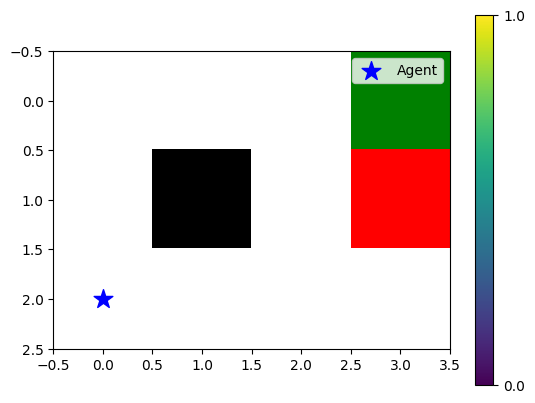

Action: 3, Next State: (2, 0), Reward: -0.1, Done: False


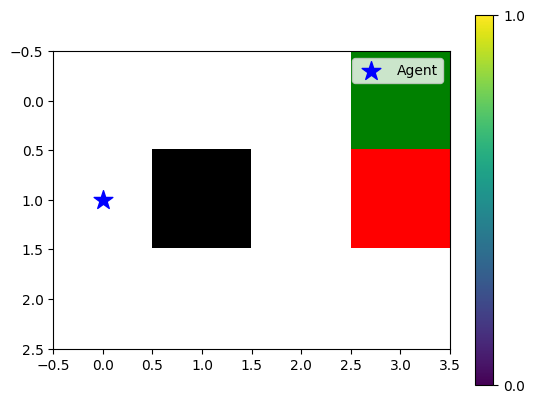

Action: 0, Next State: (1, 0), Reward: -0.1, Done: False


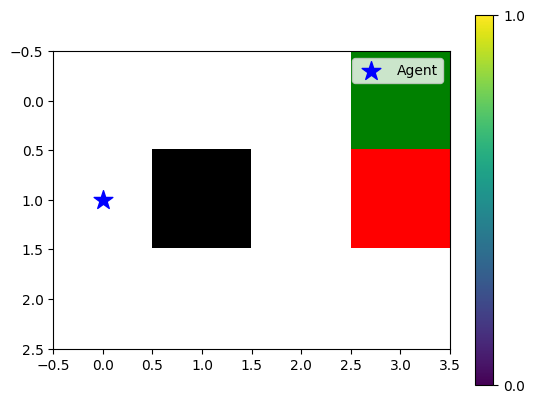

Action: 2, Next State: (1, 0), Reward: -0.1, Done: False


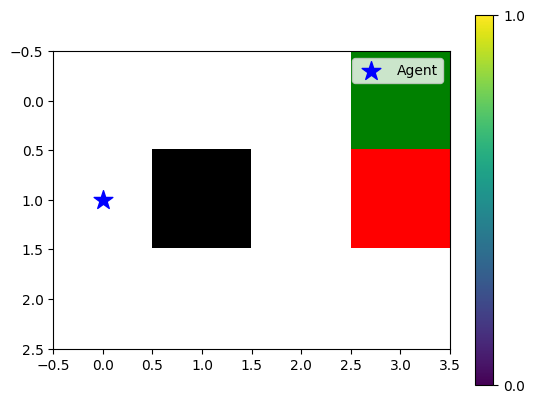

Action: 1, Next State: (1, 0), Reward: -0.1, Done: False


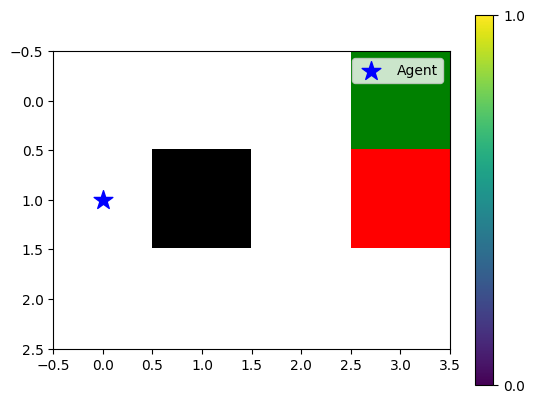

Action: 1, Next State: (1, 0), Reward: -0.1, Done: False


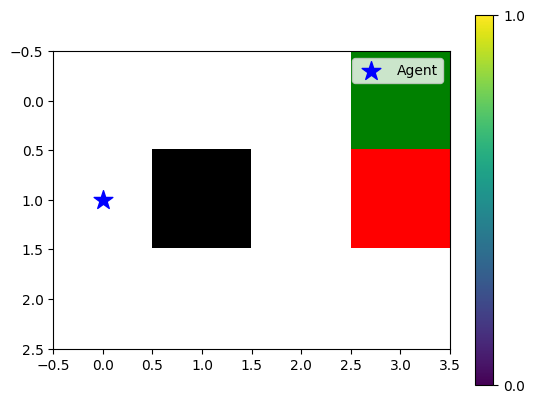

Action: 2, Next State: (1, 0), Reward: -0.1, Done: False


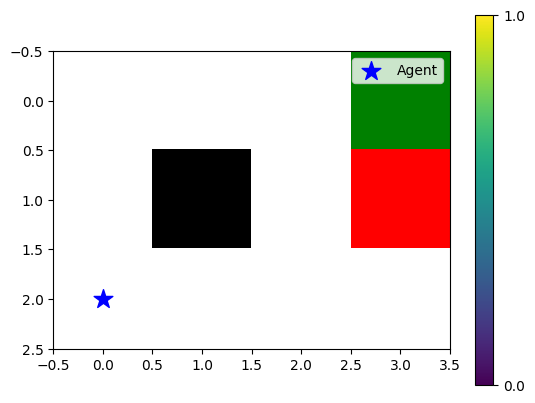

Action: 3, Next State: (2, 0), Reward: -0.1, Done: False


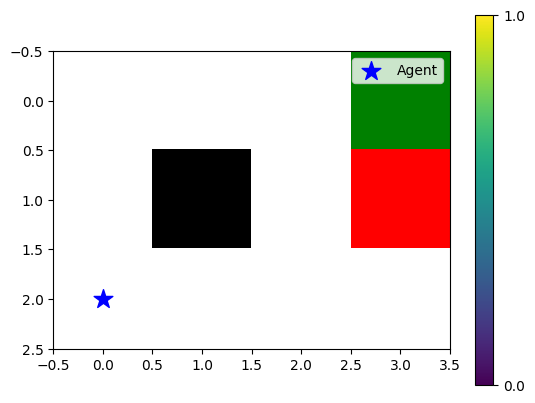

Action: 3, Next State: (2, 0), Reward: -0.1, Done: False


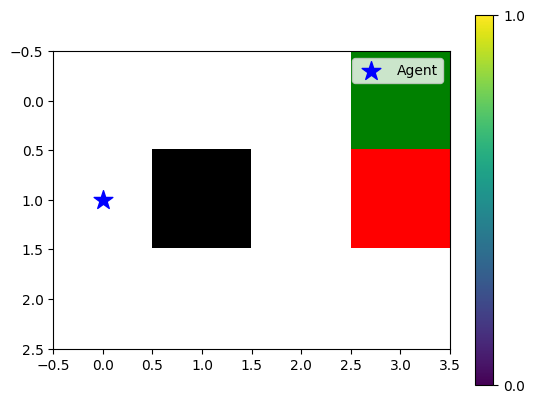

Action: 0, Next State: (1, 0), Reward: -0.1, Done: False


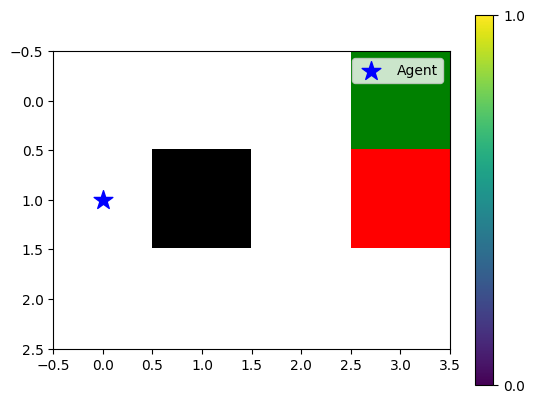

Action: 1, Next State: (1, 0), Reward: -0.1, Done: False


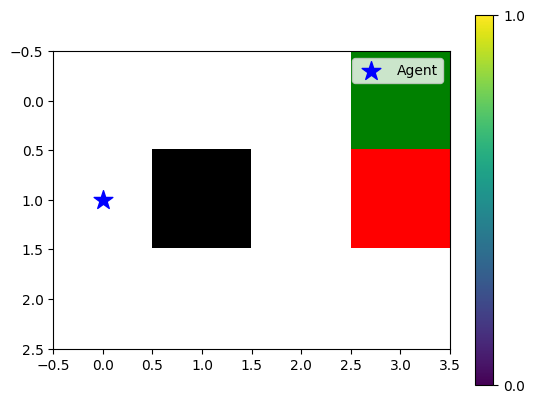

Action: 1, Next State: (1, 0), Reward: -0.1, Done: False


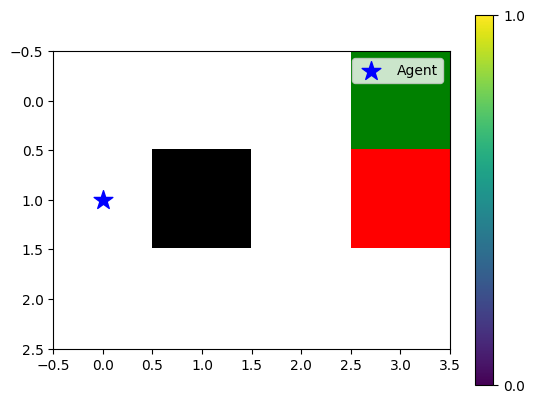

Action: 2, Next State: (1, 0), Reward: -0.1, Done: False


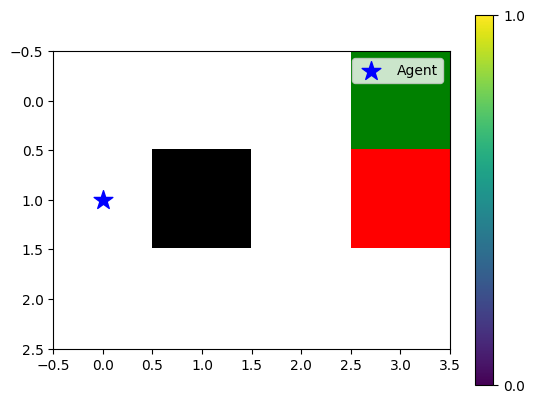

Action: 1, Next State: (1, 0), Reward: -0.1, Done: False


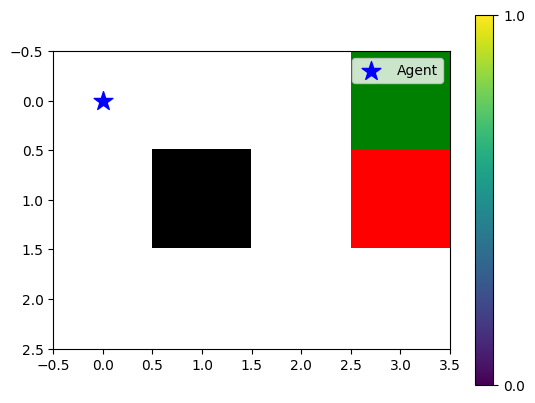

Action: 0, Next State: (0, 0), Reward: -0.1, Done: False


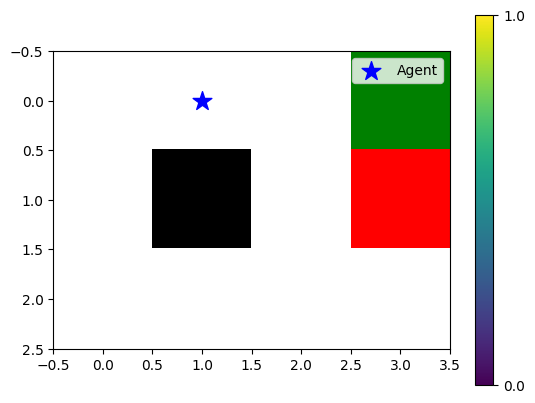

Action: 1, Next State: (0, 1), Reward: -0.1, Done: False


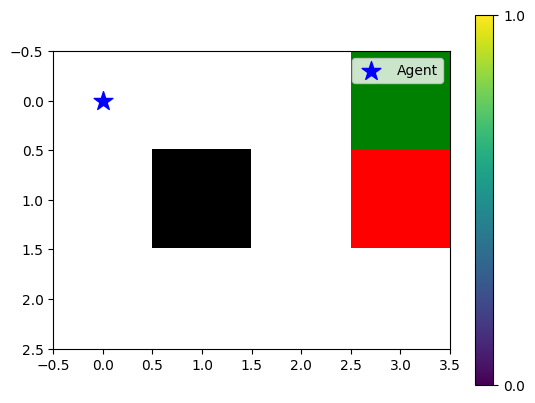

Action: 2, Next State: (0, 0), Reward: -0.1, Done: False


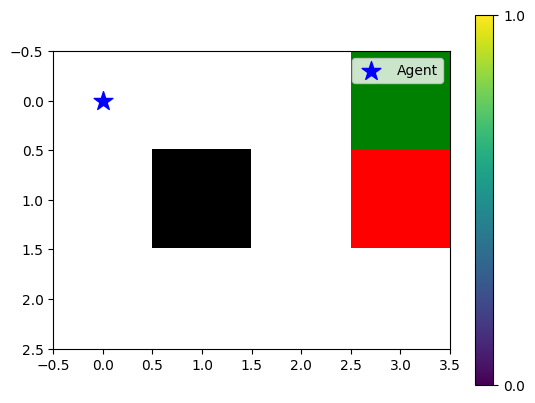

Action: 2, Next State: (0, 0), Reward: -0.1, Done: False


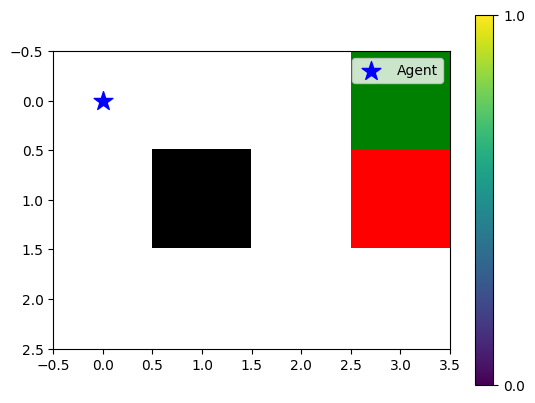

Action: 0, Next State: (0, 0), Reward: -0.1, Done: False


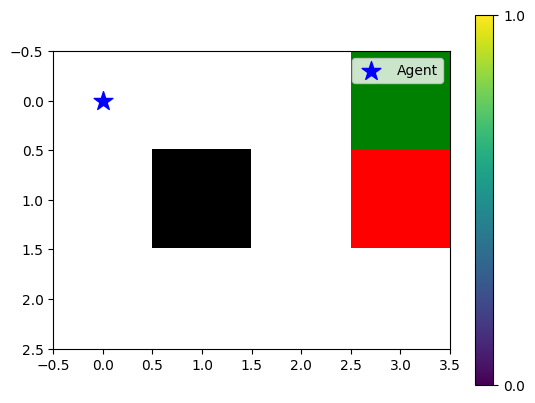

Action: 2, Next State: (0, 0), Reward: -0.1, Done: False


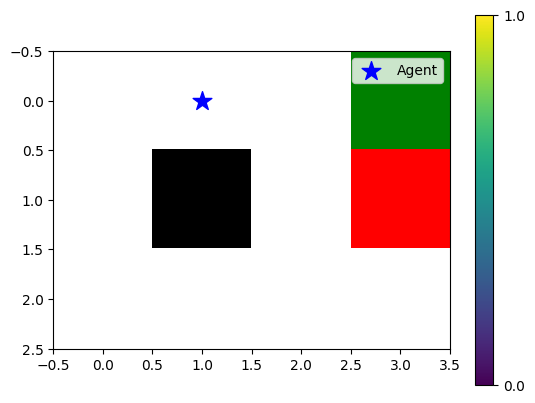

Action: 1, Next State: (0, 1), Reward: -0.1, Done: False


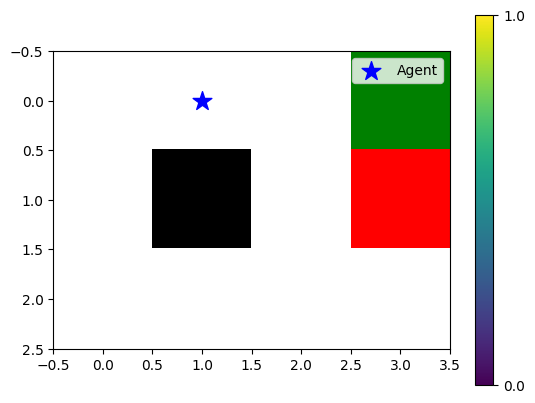

Action: 3, Next State: (0, 1), Reward: -0.1, Done: False


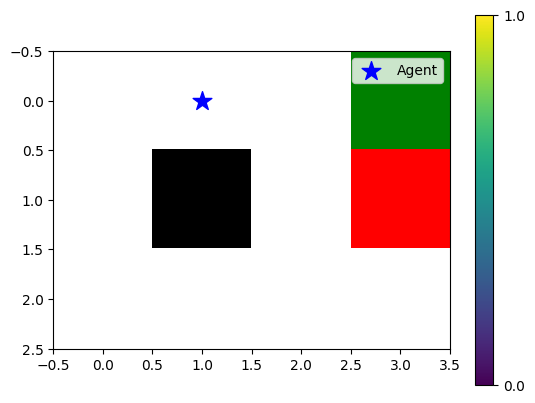

Action: 0, Next State: (0, 1), Reward: -0.1, Done: False


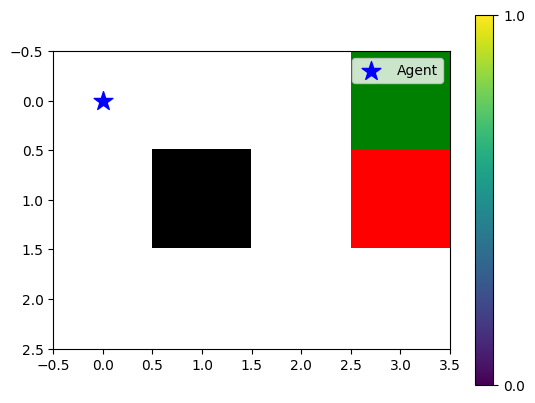

Action: 2, Next State: (0, 0), Reward: -0.1, Done: False


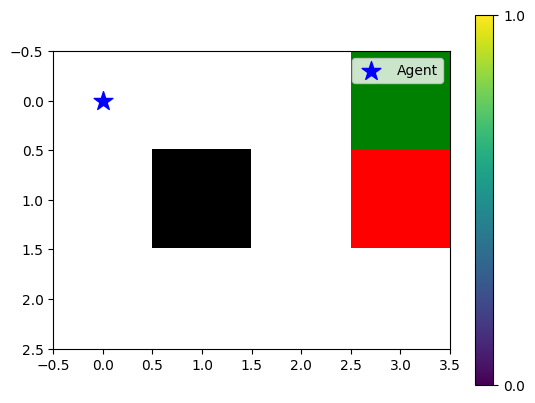

Action: 0, Next State: (0, 0), Reward: -0.1, Done: False


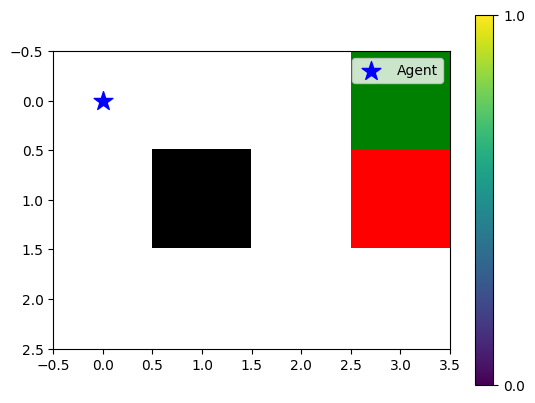

Action: 2, Next State: (0, 0), Reward: -0.1, Done: False


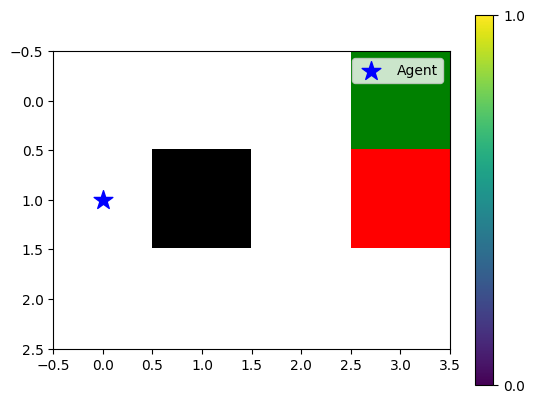

Action: 3, Next State: (1, 0), Reward: -0.1, Done: False


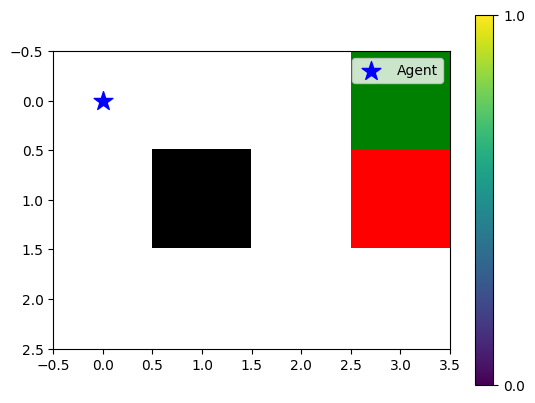

Action: 0, Next State: (0, 0), Reward: -0.1, Done: False


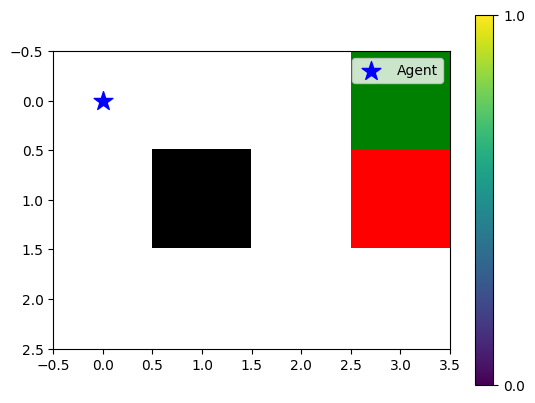

Action: 2, Next State: (0, 0), Reward: -0.1, Done: False


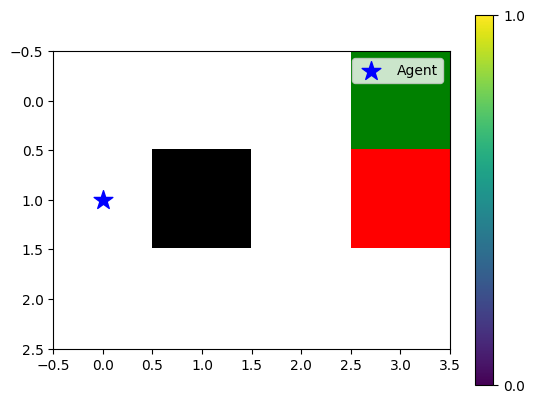

Action: 3, Next State: (1, 0), Reward: -0.1, Done: False


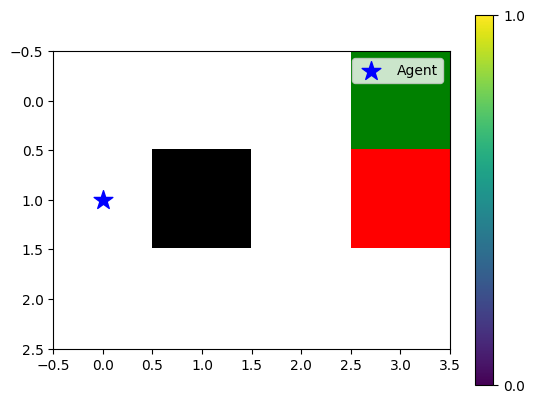

Action: 2, Next State: (1, 0), Reward: -0.1, Done: False


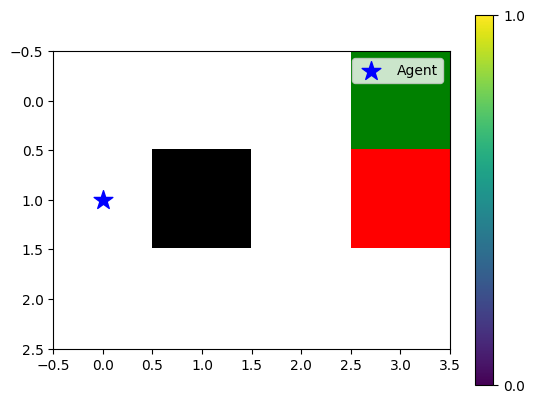

Action: 2, Next State: (1, 0), Reward: -0.1, Done: True


In [ ]:
env = Grid_world_Env_Deterministic()

# Reset the environment
state = env.reset()
done = False

# Run one episode
while not done:
    action = np.random.choice([0, 1, 2, 3])  # Random action
    next_state, reward, done, info = env.step(action)
    env.render()
    print(f"Action: {action}, Next State: {next_state}, Reward: {reward}, Done: {done}")

#**1.	Comparison in Deteministic Environment (Noise = 0)**

# **i. On-policy MC with exploring starts**

In [ ]:
class agent_1:
    def __init__(self, env, num_episodes=1000, gamma=0.9, epsilon=0.1, target_reward=0.6):
        self.env = env
        self.num_episodes = num_episodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.target_reward = target_reward
        self.action_space = [0, 1, 2, 3]  # Up, Right, Left, Down
        self.state_action_values = {}
        self.returns = {}
        self.cumulative_rewards = []
        self.samples_to_target_reward = None
        self.training_time = None

    def print_state_values(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, np.nan)  # Initialize with NaN for non-existing states
        for state, action_values in self.state_action_values.items():
            # Average action values for the state to get state value
            matrix[state] = np.mean(list(action_values.values()))
        print("State Values (V(s)):")
        print(matrix)
        print()

    def print_action_values(self, actions=['Up', 'Right', 'Left', 'Down']):
        action_map = {0: 'Up', 1: 'Right', 2: 'Left', 3: 'Down'}
        for action in range(len(actions)):
            matrix = np.full(self.env.grid_size, np.nan)  # Initialize with NaN for non-existing state-action pairs
            for (i, j), action_values in self.state_action_values.items():
                if action in action_values:
                    matrix[i, j] = action_values[action]
            print(f"Action Values for Action {actions[action]} (Q(s, a)):")
            print(matrix)
            print()

    def print_policy(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, ' ', dtype='<U2')  # Initialize with empty string for non-existing states
        action_map = {0: 'U', 1: 'R', 2: 'L', 3: 'D'}
        for (i, j), action_values in self.state_action_values.items():
            best_action = max(action_values, key=action_values.get)
            if best_action in action_map:
                matrix[i, j] = action_map[best_action]
        print("Policy (π(s)):")
        print(matrix)
        print()

    def print_cumulative_rewards(self):
        for episode, reward in enumerate(self.cumulative_rewards):
            print(f"Episode {episode + 1}: {reward:.2f}")

    def run(self):
        start_time = time.time()  # Start timing
        total_samples = 0

        for episode in range(self.num_episodes):
            state = self.env.reset()
            episode_states_actions_rewards = []
            episode_cumulative_reward = 0
            done = False
            steps = 0

            while not done:
                steps += 1
                if state not in self.state_action_values:
                    self.state_action_values[state] = {action: 0 for action in self.action_space}
                    self.returns[state] = {action: [] for action in self.action_space}
                    action = random.choice(self.action_space)  # Exploring starts
                else:
                    if random.random() < self.epsilon:
                        action = random.choice(self.action_space)  # Exploration
                    else:
                        action = max(self.state_action_values[state], key=self.state_action_values[state].get)

                next_state, reward, done, _ = self.env.step(action)
                episode_states_actions_rewards.append((state, action, reward))
                episode_cumulative_reward += reward
                state = next_state

            total_samples += steps
            self.cumulative_rewards.append(episode_cumulative_reward)

            # Update state-action values
            G = 0
            for t in reversed(range(len(episode_states_actions_rewards))):
                state, action, reward = episode_states_actions_rewards[t]
                G = self.gamma * G + reward
                if (state, action) not in [(sa[0], sa[1]) for sa in episode_states_actions_rewards[:t]]:
                    self.returns[state][action].append(G)
                    self.state_action_values[state][action] = np.mean(self.returns[state][action])

            # Check if we reached the target reward level
            if episode_cumulative_reward >= self.target_reward and self.samples_to_target_reward is None:
                self.samples_to_target_reward = total_samples

        self.training_time = time.time() - start_time  # End timing

        # Compute policy based on state-action values
        self.policy = {}
        for state, actions in self.state_action_values.items():
            self.policy[state] = max(actions, key=actions.get)

        # Print results
        self.print_state_values()
        self.print_action_values()
        self.print_policy()
        self.print_cumulative_rewards()


        return self.state_action_values, self.policy, self.cumulative_rewards, self.samples_to_target_reward, self.training_time


In [ ]:
env = Grid_world_Env_Deterministic()
agent1 = agent_1(env)
state_action_values, policy, cumulative_rewards, samples_to_target_reward, training_time = agent1.run()
print("Cumulative Rewards:", np.mean(cumulative_rewards))
print(f"Total samples to reach target reward: {samples_to_target_reward}")
print(f"Training time: {training_time:.2f} seconds")

State Values (V(s)):
[[-0.69757351  0.04091424  0.73034213         nan]
 [-0.51723297         nan  0.16617107         nan]
 [ 0.02454441  0.21730599  0.31633396 -0.62554548]]

Action Values for Action Up (Q(s, a)):
[[-0.9282102   0.3122      0.7757931          nan]
 [-0.94766524         nan  0.77516577         nan]
 [-0.20189041  0.235412    0.55442493 -1.        ]]

Action Values for Action Right (Q(s, a)):
[[-0.94185026  0.78684615  1.                 nan]
 [-0.72721754         nan -1.                 nan]
 [ 0.22509844  0.37656823  0.1699989  -0.91137062]]

Action Values for Action Left (Q(s, a)):
[[-0.92023356 -0.93538918  0.59127615         nan]
 [-0.40552446         nan  0.52151231         nan]
 [-0.04662484  0.02233994  0.2202598   0.4091887 ]]

Action Values for Action Down (Q(s, a)):
[[ 0.          0.          0.55429928         nan]
 [ 0.01147534         nan  0.36800621         nan]
 [ 0.12159444  0.23490381  0.32065222 -1.        ]]

Policy (π(s)):
[['D' 'R' 'R' ' ']
 ['D' '

# **ii. On-policy MC control without exploring starts**

In [ ]:
class agent_2:
    def __init__(self, env, num_episodes=1000, gamma=0.9, epsilon=0.1, target_reward=0.6):
        self.env = env
        self.num_episodes = num_episodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.target_reward = target_reward
        self.action_space = [0, 1, 2, 3]  # Up, Right, Left, Down
        self.state_action_values = {}
        self.returns = {}
        self.cumulative_rewards = []
        self.samples_to_target_reward = None
        self.training_time = None

    def print_state_values(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, np.nan)  # Initialize with NaN for non-existing states
        for state, action_values in self.state_action_values.items():
            # Average action values for the state to get state value
            matrix[state] = np.mean(list(action_values.values()))
        print("State Values (V(s)):")
        print(matrix)
        print()

    def print_action_values(self, actions=['Up', 'Right', 'Left', 'Down']):
        action_map = {0: 'Up', 1: 'Right', 2: 'Left', 3: 'Down'}
        for action in range(len(actions)):
            matrix = np.full(self.env.grid_size, np.nan)  # Initialize with NaN for non-existing state-action pairs
            for (i, j), action_values in self.state_action_values.items():
                if action in action_values:
                    matrix[i, j] = action_values[action]
            print(f"Action Values for Action {actions[action]} (Q(s, a)):")
            print(matrix)
            print()

    def print_policy(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, ' ', dtype='<U2')  # Initialize with empty string for non-existing states
        action_map = {0: 'U', 1: 'R', 2: 'L', 3: 'D'}
        for (i, j), action_values in self.state_action_values.items():
            best_action = max(action_values, key=action_values.get)
            if best_action in action_map:
                matrix[i, j] = action_map[best_action]
        print("Policy (π(s)):")
        print(matrix)
        print()

    def print_cumulative_rewards(self):
        for episode, reward in enumerate(self.cumulative_rewards):
            print(f"Episode {episode + 1}: {reward:.2f}")

    def run(self):
        start_time = time.time()  # Start timing
        total_samples = 0

        for episode in range(self.num_episodes):
            state = self.env.reset()
            episode_states_actions_rewards = []
            episode_cumulative_reward = 0
            done = False
            steps = 0

            while not done:
                steps += 1
                if state not in self.state_action_values:
                    self.state_action_values[state] = {action: 0 for action in self.action_space}
                    self.returns[state] = {action: [] for action in self.action_space}
                if random.random() < self.epsilon:
                    action = random.choice(self.action_space)  # Exploration
                else:
                    action = max(self.state_action_values[state], key=self.state_action_values[state].get)

                next_state, reward, done, _ = self.env.step(action)
                episode_states_actions_rewards.append((state, action, reward))
                episode_cumulative_reward += reward
                state = next_state

            total_samples += steps
            self.cumulative_rewards.append(episode_cumulative_reward)

            # Update state-action values
            G = 0
            for t in reversed(range(len(episode_states_actions_rewards))):
                state, action, reward = episode_states_actions_rewards[t]
                G = self.gamma * G + reward
                if (state, action) not in [(sa[0], sa[1]) for sa in episode_states_actions_rewards[:t]]:
                    self.returns[state][action].append(G)
                    self.state_action_values[state][action] = np.mean(self.returns[state][action])

            # Check if we reached the target reward level
            if episode_cumulative_reward >= self.target_reward and self.samples_to_target_reward is None:
                self.samples_to_target_reward = total_samples

        self.training_time = time.time() - start_time  # End timing

        # Compute policy based on state-action values
        self.policy = {}
        for state, actions in self.state_action_values.items():
            self.policy[state] = max(actions, key=actions.get)

        # Print results
        self.print_state_values()
        self.print_action_values()
        self.print_policy()
        self.print_cumulative_rewards()

        return self.state_action_values, self.policy, self.cumulative_rewards, self.samples_to_target_reward, self.training_time


In [ ]:
env = Grid_world_Env_Deterministic()
agent2 = agent_2(env)
state_action_values, policy, cumulative_rewards, samples_to_target_reward, training_time = agent2.run()
print("Cumulative Rewards:", np.mean(cumulative_rewards))
print(f"Total samples to reach target reward: {samples_to_target_reward}")
print(f"Training time: {training_time:.2f} seconds")

State Values (V(s)):
[[ 0.13582236  0.51792497  0.55212983         nan]
 [-0.01643324         nan -0.39588156         nan]
 [-0.20025606 -0.64301252 -0.54488097 -0.66062081]]

Action Values for Action Up (Q(s, a)):
[[-8.21521595e-04  4.74765235e-01  6.79389490e-01             nan]
 [ 3.71684687e-01             nan  6.66508525e-01             nan]
 [ 2.03171438e-01 -8.84564447e-01 -7.20081853e-01 -1.00000000e+00]]

Action Values for Action Right (Q(s, a)):
[[ 0.56063011  0.75806029  1.                 nan]
 [-0.14256577         nan -1.                 nan]
 [-0.42691635 -0.75398075 -0.76124981 -0.90152291]]

Action Values for Action Left (Q(s, a)):
[[ 0.00877178  0.32423644  0.52996367         nan]
 [-0.06304209         nan -0.93538918         nan]
 [-0.3006883  -0.21405332 -0.11946516 -0.43831719]]

Action Values for Action Down (Q(s, a)):
[[-0.02529092  0.5146379  -0.00083386         nan]
 [-0.23180979         nan -0.31464557         nan]
 [-0.27659104 -0.71945158 -0.57872705 -0.30264

# **iii. Off-policy MC prediction**

In [ ]:
class agent_3:
    def __init__(self, env, num_episodes=1000, gamma=0.9, epsilon=0.1, target_reward=0.6):
        self.env = env
        self.num_episodes = num_episodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.target_reward = target_reward
        self.action_space = [0, 1, 2, 3]  # Up, Right, Left, Down
        self.state_action_values = {}
        self.returns = {}
        self.cumulative_rewards = []
        self.samples_to_target_reward = None
        self.training_time = None

    def epsilon_greedy(self, state):
        if random.random() < self.epsilon:
            return random.choice(self.action_space)  # Exploration
        else:
            return self.target_policy(state)  # Exploitation

    def target_policy(self, state):
        if state in self.state_action_values:
            return max(self.state_action_values[state], key=self.state_action_values[state].get)
        return random.choice(self.action_space)

    def print_state_values(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, np.nan)  # Initialize with NaN for non-existing states
        for state, action_values in self.state_action_values.items():
            # Average action values for the state to get state value
            matrix[state] = np.mean(list(action_values.values()))
        print("State Values (V(s)):")
        print(matrix)
        print()

    def print_action_values(self, actions=['Up', 'Right', 'Left', 'Down']):
        action_map = {0: 'Up', 1: 'Right', 2: 'Left', 3: 'Down'}
        for action in range(len(actions)):
            matrix = np.full(self.env.grid_size, np.nan)  # Initialize with NaN for non-existing state-action pairs
            for (i, j), action_values in self.state_action_values.items():
                if action in action_values:
                    matrix[i, j] = action_values[action]
            print(f"Action Values for Action {actions[action]} (Q(s, a)):")
            print(matrix)
            print()

    def print_policy(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, ' ', dtype='<U2')  # Initialize with empty string for non-existing states
        action_map = {0: 'U', 1: 'R', 2: 'L', 3: 'D'}
        for (i, j), action_values in self.state_action_values.items():
            best_action = max(action_values, key=action_values.get)
            if best_action in action_map:
                matrix[i, j] = action_map[best_action]
        print("Policy (π(s)):")
        print(matrix)
        print()

    def print_cumulative_rewards(self):
        for episode, reward in enumerate(self.cumulative_rewards):
            print(f"Episode {episode + 1}: {reward:.2f}")

    def run(self):
        start_time = time.time()  # Start timing
        total_samples = 0

        for episode in range(self.num_episodes):
            state = self.env.reset()
            episode_states_actions_rewards = []
            episode_cumulative_reward = 0
            done = False
            steps = 0

            while not done:
                steps += 1
                if state not in self.state_action_values:
                    self.state_action_values[state] = {action: 0 for action in self.action_space}
                    self.returns[state] = {action: [] for action in self.action_space}

                action = self.epsilon_greedy(state)
                next_state, reward, done, _ = self.env.step(action)
                episode_states_actions_rewards.append((state, action, reward))
                episode_cumulative_reward += reward
                state = next_state

            total_samples += steps
            self.cumulative_rewards.append(episode_cumulative_reward)

            # Update state-action values using importance sampling
            G = 0
            W = 1
            for t in reversed(range(len(episode_states_actions_rewards))):
                state, action, reward = episode_states_actions_rewards[t]
                G = self.gamma * G + reward
                if (state, action) not in [(sa[0], sa[1]) for sa in episode_states_actions_rewards[:t]]:
                    if W == 0:
                        break
                    self.returns[state][action].append(G)
                    self.state_action_values[state][action] += (W / len(self.returns[state][action])) * (G - self.state_action_values[state][action])
                    if action != self.target_policy(state):
                        break
                    W *= 1.0 / self.epsilon  # Update importance sampling weight

            # Check if we reached the target reward level
            if episode_cumulative_reward >= self.target_reward and self.samples_to_target_reward is None:
                self.samples_to_target_reward = total_samples

        self.training_time = time.time() - start_time  # End timing

        # Compute policy based on state-action values
        self.policy = {}
        for state, actions in self.state_action_values.items():
            self.policy[state] = max(actions, key=actions.get)

        # Print results
        self.print_state_values()
        self.print_action_values()
        self.print_policy()
        self.print_cumulative_rewards()

        return self.state_action_values, self.policy, self.cumulative_rewards, self.samples_to_target_reward, self.training_time


In [ ]:
env = Grid_world_Env_Deterministic()
agent3 = agent_3(env)
state_action_values, policy, cumulative_rewards, samples_to_target_reward, training_time = agent3.run()
print("Cumulative Rewards:", np.mean(cumulative_rewards))
print(f"Total samples to reach target reward: {samples_to_target_reward}")
print(f"Training time: {training_time:.2f} seconds")

State Values (V(s)):
[[-2.16837639e+02 -3.73090435e+00 -6.80947020e-01             nan]
 [ 9.11018351e+00             nan  9.49819090e+00             nan]
 [ 3.71493214e+03 -3.58116089e+12 -6.91906700e+02 -6.63207238e+03]]

Action Values for Action Up (Q(s, a)):
[[-4.81617111 -4.11146517 -3.72378808         nan]
 [-0.65302615         nan  0.79999989         nan]
 [-0.64661302 -2.69127821 -0.55826198 -1.        ]]

Action Values for Action Right (Q(s, a)):
[[-8.59609361e+02 -6.40000000e+00  1.00000000e+00             nan]
 [-1.78745074e+00             nan -1.00000000e+00             nan]
 [-7.60884013e-01 -1.43246436e+13 -2.29918537e+03  7.86772630e-01]]

Action Values for Action Left (Q(s, a)):
[[-2.32826667e+00 -3.74978996e+00  0.00000000e+00             nan]
 [ 3.78323485e+01             nan  3.89698091e+01             nan]
 [ 1.48517424e+04 -7.85145394e-01 -4.33605346e+02 -2.65267113e+04]]

Action Values for Action Down (Q(s, a)):
[[ -0.59675757  -0.66236227   0.                  na

# **iv. Off-policy MC control**

In [ ]:
class agent_4:
    def __init__(self, env, num_episodes=1000, gamma=0.9, epsilon=0.1, target_reward=0.6):
        self.env = env
        self.num_episodes = num_episodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.target_reward = target_reward
        self.action_space = [0, 1, 2, 3]  # Up, Right, Left, Down
        self.state_action_values = {}
        self.returns = {}
        self.cumulative_rewards = []
        self.samples_to_target_reward = None
        self.training_time = None

    def behavior_policy(self, state):
        if state in self.state_action_values and random.random() > self.epsilon:
            return max(self.state_action_values[state], key=self.state_action_values[state].get)
        return random.choice(self.action_space)

    def target_policy(self, state):
        if state in self.state_action_values:
            return max(self.state_action_values[state], key=self.state_action_values[state].get)
        return random.choice(self.action_space)

    def print_state_values(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, np.nan)  # Initialize with NaN for non-existing states
        for state, action_values in self.state_action_values.items():
            # Average action values for the state to get state value
            matrix[state] = np.mean(list(action_values.values()))
        print("State Values (V(s)):")
        print(matrix)
        print()

    def print_action_values(self, actions=['Up', 'Right', 'Left', 'Down']):
        action_map = {0: 'Up', 1: 'Right', 2: 'Left', 3: 'Down'}
        for action in range(len(actions)):
            matrix = np.full(self.env.grid_size, np.nan)  # Initialize with NaN for non-existing state-action pairs
            for (i, j), action_values in self.state_action_values.items():
                if action in action_values:
                    matrix[i, j] = action_values[action]
            print(f"Action Values for Action {actions[action]} (Q(s, a)):")
            print(matrix)
            print()

    def print_policy(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, ' ', dtype='<U2')  # Initialize with empty string for non-existing states
        action_map = {0: 'U', 1: 'R', 2: 'L', 3: 'D'}
        for (i, j), action_values in self.state_action_values.items():
            best_action = max(action_values, key=action_values.get)
            if best_action in action_map:
                matrix[i, j] = action_map[best_action]
        print("Policy (π(s)):")
        print(matrix)
        print()

    def print_cumulative_rewards(self):
        for episode, reward in enumerate(self.cumulative_rewards):
            print(f"Episode {episode + 1}: {reward:.2f}")

    def run(self):
        start_time = time.time()  # Start timing
        total_samples = 0

        for episode in range(self.num_episodes):
            state = self.env.reset()
            episode_states_actions_rewards = []
            episode_cumulative_reward = 0
            done = False
            steps = 0

            while not done:
                steps += 1
                if state not in self.state_action_values:
                    self.state_action_values[state] = {action: 0 for action in self.action_space}
                    self.returns[state] = {action: [] for action in self.action_space}

                action = self.behavior_policy(state)
                next_state, reward, done, _ = self.env.step(action)
                episode_states_actions_rewards.append((state, action, reward))
                episode_cumulative_reward += reward
                state = next_state

            total_samples += steps
            self.cumulative_rewards.append(episode_cumulative_reward)

            # Update state-action values
            G = 0
            for t in reversed(range(len(episode_states_actions_rewards))):
                state, action, reward = episode_states_actions_rewards[t]
                G = self.gamma * G + reward
                if (state, action) not in [(sa[0], sa[1]) for sa in episode_states_actions_rewards[:t]]:
                    self.returns[state][action].append(G)
                    self.state_action_values[state][action] += (1 / len(self.returns[state][action])) * (G - self.state_action_values[state][action])
                    if action != self.target_policy(state):
                        break

            # Check if we reached the target reward level
            if episode_cumulative_reward >= self.target_reward and self.samples_to_target_reward is None:
                self.samples_to_target_reward = total_samples

        self.training_time = time.time() - start_time  # End timing

        # Compute policy based on state-action values
        self.policy = {}
        for state, actions in self.state_action_values.items():
            self.policy[state] = max(actions, key=actions.get)

        # Print results
        self.print_state_values()
        self.print_action_values()
        self.print_policy()
        self.print_cumulative_rewards()

        return self.state_action_values, self.policy, self.cumulative_rewards, self.samples_to_target_reward, self.training_time


In [ ]:
env = Grid_world_Env_Deterministic()
agent4 = agent_4(env)
state_action_values, policy, cumulative_rewards, samples_to_target_reward, training_time = agent4.run()
print("Cumulative Rewards:", np.mean(cumulative_rewards))
print(f"Total samples to reach target reward: {samples_to_target_reward}")
print(f"Training time: {training_time:.2f} seconds")

State Values (V(s)):
[[ 0.4457969   0.60537713  0.73777662         nan]
 [ 0.315845           nan  0.4695             nan]
 [ 0.24179537 -0.03929961  0.155              nan]]

Action Values for Action Up (Q(s, a)):
[[0.40156405 0.54350852 0.72649648        nan]
 [0.458             nan 0.8               nan]
 [0.3122     0.         0.62              nan]]

Action Values for Action Right (Q(s, a)):
[[0.62   0.8    1.        nan]
 [0.3122    nan 0.        nan]
 [0.3122 0.458  0.        nan]]

Action Values for Action Left (Q(s, a)):
[[0.44942353 0.458      0.60461           nan]
 [0.3122            nan 0.62              nan]
 [0.16874842 0.         0.                nan]]

Action Values for Action Down (Q(s, a)):
[[ 0.3122      0.62        0.62               nan]
 [ 0.18098            nan  0.458              nan]
 [ 0.17403306 -0.61519845  0.                 nan]]

Policy (π(s)):
[['R' 'R' 'R' ' ']
 ['U' ' ' 'U' ' ']
 ['U' 'R' 'U' ' ']]

Episode 1: -3.10
Episode 2: -3.10
Episode 3: -3.10


`Reasons behind observation some empty states`

- **Blocked Cell:** this cell are not valid states for the agent to enter, hence no action is associated with them.
- **Fire Cell:** Reaching this cell terminates the episode, so no further actions are taken from these states.
- **Goal Cell:** Once the agent reaches the goal, the episode ends, so no action is required for this cell.
- **Other Cells:** Some cells  have empty actions may be due to  they were not visited frequently enough during training or  the agent's policy was not sufficiently trained to assign a confident action for those states.

#**2.	Comparison in Stochastic Environment (Noise = 0.4)**

In [4]:
class Grid_world_Env_Deterministic(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, grid_size=(3, 4), start=(2, 0), goal=(0, 3), fire_cells=[(1, 3)], blocked_cells=[(1, 1)], noise=0.4):
        super(Grid_world_Env_Deterministic, self).__init__()

        self.grid_size = grid_size
        self.start = start
        self.goal = goal

        self.fire_cells = fire_cells
        self.blocked_cells = blocked_cells
        self.noise = noise
        self.current_position = start

        self.action_space = spaces.Discrete(4)
        # Actions: 0=Up, 1=Right, 2=Left, 3=Down
        self.observation_space = spaces.Tuple((spaces.Discrete(grid_size[0]), spaces.Discrete(grid_size[1])))

        self.rewards = np.full(grid_size, -0.1)  # Reward for each step
        self.rewards[goal] = 1  # Goal state reward
        for cell in fire_cells:
            self.rewards[cell] = -1  # Danger state reward
        for cell in blocked_cells:
            self.rewards[cell] = 0  # Blocked cells

        self.episode_length = 1

    def reset(self):
        self.current_position = self.start
        self.episode_length = 0  # Reset episode length counter
        return self.current_position

    def is_valid_state(self, x, y):
        return 0 <= x < self.grid_size[0] and 0 <= y < self.grid_size[1] and (x, y) not in self.blocked_cells

    def step(self, action):
        if np.random.rand() < self.noise:
            action = np.random.choice([0, 1, 2, 3])

        x, y = self.current_position
        if action == 0:  # Up
            new_x, new_y = x - 1, y
        elif action == 1:  # Right
            new_x, new_y = x, y + 1
        elif action == 2:  # Left
            new_x, new_y = x, y - 1
        elif action == 3:  # Down
            new_x, new_y = x + 1, y

        if not self.is_valid_state(new_x, new_y):
            new_x, new_y = x, y

        reward = self.rewards[new_x, new_y]
        done = (new_x, new_y) == self.goal or (new_x, new_y) in self.fire_cells or self.episode_length >= 30

        self.current_position = (new_x, new_y)
        self.episode_length += 1  # Increment episode length

        return (new_x, new_y), reward, done, {}

    def render(self, mode='human'):
        grid_copy = np.full(self.grid_size, -0.1)  # Initialize grid with -0.1

        # Mark goal, fire, and blocked cells
        grid_copy[self.goal] = 1
        for cell in self.fire_cells:
            grid_copy[cell] = -1
        for cell in self.blocked_cells:
            grid_copy[cell] = 0

        # Define a color map for the grid
        cmap = colors.ListedColormap(['red', 'white', 'black',  'green'])
        bounds = [-1.1, -0.3, -0.1, 0.1, 1.1]
        norm = colors.BoundaryNorm(bounds, cmap.N)

        # Plot the grid
        plt.imshow(grid_copy, cmap=cmap, norm=norm, interpolation='nearest')

        # Mark the agent's position with a different marker
        agent_x, agent_y = self.current_position
        plt.scatter(agent_y, agent_x, c='blue', s=200, marker='*', label='Agent')

        plt.colorbar(ticks=[-1, 0, -0.1, 1], format='%0.1f')
        plt.legend()
        plt.show()

# **i. On-policy MC with exploring starts**

In [5]:
class agent_1:
    def __init__(self, env, num_episodes=1000, gamma=0.9, epsilon=0.1, target_reward=0.6):
        self.env = env
        self.num_episodes = num_episodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.target_reward = target_reward
        self.action_space = [0, 1, 2, 3]  # Up, Right, Left, Down
        self.state_action_values = {}
        self.returns = {}
        self.cumulative_rewards = []
        self.samples_to_target_reward = None
        self.training_time = None

    def print_state_values(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, np.nan)  # Initialize with NaN for non-existing states
        for state, action_values in self.state_action_values.items():
            # Average action values for the state to get state value
            matrix[state] = np.mean(list(action_values.values()))
        print("State Values (V(s)):")
        print(matrix)
        print()

    def print_action_values(self, actions=['Up', 'Right', 'Left', 'Down']):
        action_map = {0: 'Up', 1: 'Right', 2: 'Left', 3: 'Down'}
        for action in range(len(actions)):
            matrix = np.full(self.env.grid_size, np.nan)  # Initialize with NaN for non-existing state-action pairs
            for (i, j), action_values in self.state_action_values.items():
                if action in action_values:
                    matrix[i, j] = action_values[action]
            print(f"Action Values for Action {actions[action]} (Q(s, a)):")
            print(matrix)
            print()

    def print_policy(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, ' ', dtype='<U2')  # Initialize with empty string for non-existing states
        action_map = {0: 'U', 1: 'R', 2: 'L', 3: 'D'}
        for (i, j), action_values in self.state_action_values.items():
            best_action = max(action_values, key=action_values.get)
            if best_action in action_map:
                matrix[i, j] = action_map[best_action]
        print("Policy (π(s)):")
        print(matrix)
        print()

    def print_cumulative_rewards(self):
        for episode, reward in enumerate(self.cumulative_rewards):
            print(f"Episode {episode + 1}: {reward:.2f}")

    def run(self):
        start_time = time.time()  # Start timing
        total_samples = 0

        for episode in range(self.num_episodes):
            state = self.env.reset()
            episode_states_actions_rewards = []
            episode_cumulative_reward = 0
            done = False
            steps = 0

            while not done:
                steps += 1
                if state not in self.state_action_values:
                    self.state_action_values[state] = {action: 0 for action in self.action_space}
                    self.returns[state] = {action: [] for action in self.action_space}
                    action = random.choice(self.action_space)  # Exploring starts
                else:
                    if random.random() < self.epsilon:
                        action = random.choice(self.action_space)  # Exploration
                    else:
                        action = max(self.state_action_values[state], key=self.state_action_values[state].get)

                next_state, reward, done, _ = self.env.step(action)
                episode_states_actions_rewards.append((state, action, reward))
                episode_cumulative_reward += reward
                state = next_state

            total_samples += steps
            self.cumulative_rewards.append(episode_cumulative_reward)

            # Update state-action values
            G = 0
            for t in reversed(range(len(episode_states_actions_rewards))):
                state, action, reward = episode_states_actions_rewards[t]
                G = self.gamma * G + reward
                if (state, action) not in [(sa[0], sa[1]) for sa in episode_states_actions_rewards[:t]]:
                    self.returns[state][action].append(G)
                    self.state_action_values[state][action] = np.mean(self.returns[state][action])

            # Check if we reached the target reward level
            if episode_cumulative_reward >= self.target_reward and self.samples_to_target_reward is None:
                self.samples_to_target_reward = total_samples

        self.training_time = time.time() - start_time  # End timing

        # Compute policy based on state-action values
        self.policy = {}
        for state, actions in self.state_action_values.items():
            self.policy[state] = max(actions, key=actions.get)

        # Print results
        self.print_state_values()
        self.print_action_values()
        self.print_policy()
        self.print_cumulative_rewards()


        return self.state_action_values, self.policy, self.cumulative_rewards, self.samples_to_target_reward, self.training_time


In [6]:
env = Grid_world_Env_Deterministic()
agent1 = agent_1(env)
state_action_values, policy, cumulative_rewards, samples_to_target_reward, training_time = agent1.run()
print("Cumulative Rewards:", np.mean(cumulative_rewards))
print(f"Total samples to reach target reward: {samples_to_target_reward}")
print(f"Training time: {training_time:.2f} seconds")

State Values (V(s)):
[[ 0.15152832  0.32721468  0.52604443         nan]
 [-0.09350963         nan -0.3342707          nan]
 [-0.26068111 -0.38029139 -0.41616205 -0.79528215]]

Action Values for Action Up (Q(s, a)):
[[ 0.05501955  0.3045837   0.73579172         nan]
 [ 0.05916097         nan  0.30814893         nan]
 [-0.10820089 -0.66734606 -0.00198751 -1.        ]]

Action Values for Action Right (Q(s, a)):
[[ 0.26224637  0.50611012  0.8110633          nan]
 [-0.1004918          nan -0.77569231         nan]
 [-0.32552502 -0.1262174  -0.56602501 -1.        ]]

Action Values for Action Left (Q(s, a)):
[[ 0.24051447  0.28587058  0.34752967         nan]
 [-0.13320244         nan -0.13728385         nan]
 [-0.29079389 -0.238924   -0.40270521 -0.5354226 ]]

Action Values for Action Down (Q(s, a)):
[[ 0.04833287  0.21229431  0.20979304         nan]
 [-0.19950526         nan -0.73225556         nan]
 [-0.31820463 -0.48867811 -0.69393048 -0.645706  ]]

Policy (π(s)):
[['R' 'R' 'R' ' ']
 ['U' '

# **ii. On-policy MC control without exploring starts**

In [7]:
class agent_2:
    def __init__(self, env, num_episodes=1000, gamma=0.9, epsilon=0.1, target_reward=0.6):
        self.env = env
        self.num_episodes = num_episodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.target_reward = target_reward
        self.action_space = [0, 1, 2, 3]  # Up, Right, Left, Down
        self.state_action_values = {}
        self.returns = {}
        self.cumulative_rewards = []
        self.samples_to_target_reward = None
        self.training_time = None

    def print_state_values(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, np.nan)  # Initialize with NaN for non-existing states
        for state, action_values in self.state_action_values.items():
            # Average action values for the state to get state value
            matrix[state] = np.mean(list(action_values.values()))
        print("State Values (V(s)):")
        print(matrix)
        print()

    def print_action_values(self, actions=['Up', 'Right', 'Left', 'Down']):
        action_map = {0: 'Up', 1: 'Right', 2: 'Left', 3: 'Down'}
        for action in range(len(actions)):
            matrix = np.full(self.env.grid_size, np.nan)  # Initialize with NaN for non-existing state-action pairs
            for (i, j), action_values in self.state_action_values.items():
                if action in action_values:
                    matrix[i, j] = action_values[action]
            print(f"Action Values for Action {actions[action]} (Q(s, a)):")
            print(matrix)
            print()

    def print_policy(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, ' ', dtype='<U2')  # Initialize with empty string for non-existing states
        action_map = {0: 'U', 1: 'R', 2: 'L', 3: 'D'}
        for (i, j), action_values in self.state_action_values.items():
            best_action = max(action_values, key=action_values.get)
            if best_action in action_map:
                matrix[i, j] = action_map[best_action]
        print("Policy (π(s)):")
        print(matrix)
        print()

    def print_cumulative_rewards(self):
        for episode, reward in enumerate(self.cumulative_rewards):
            print(f"Episode {episode + 1}: {reward:.2f}")

    def run(self):
        start_time = time.time()  # Start timing
        total_samples = 0

        for episode in range(self.num_episodes):
            state = self.env.reset()
            episode_states_actions_rewards = []
            episode_cumulative_reward = 0
            done = False
            steps = 0

            while not done:
                steps += 1
                if state not in self.state_action_values:
                    self.state_action_values[state] = {action: 0 for action in self.action_space}
                    self.returns[state] = {action: [] for action in self.action_space}
                if random.random() < self.epsilon:
                    action = random.choice(self.action_space)  # Exploration
                else:
                    action = max(self.state_action_values[state], key=self.state_action_values[state].get)

                next_state, reward, done, _ = self.env.step(action)
                episode_states_actions_rewards.append((state, action, reward))
                episode_cumulative_reward += reward
                state = next_state

            total_samples += steps
            self.cumulative_rewards.append(episode_cumulative_reward)

            # Update state-action values
            G = 0
            for t in reversed(range(len(episode_states_actions_rewards))):
                state, action, reward = episode_states_actions_rewards[t]
                G = self.gamma * G + reward
                if (state, action) not in [(sa[0], sa[1]) for sa in episode_states_actions_rewards[:t]]:
                    self.returns[state][action].append(G)
                    self.state_action_values[state][action] = np.mean(self.returns[state][action])

            # Check if we reached the target reward level
            if episode_cumulative_reward >= self.target_reward and self.samples_to_target_reward is None:
                self.samples_to_target_reward = total_samples

        self.training_time = time.time() - start_time  # End timing

        # Compute policy based on state-action values
        self.policy = {}
        for state, actions in self.state_action_values.items():
            self.policy[state] = max(actions, key=actions.get)

        # Print results
        self.print_state_values()
        self.print_action_values()
        self.print_policy()
        self.print_cumulative_rewards()

        return self.state_action_values, self.policy, self.cumulative_rewards, self.samples_to_target_reward, self.training_time


In [8]:
env = Grid_world_Env_Deterministic()
agent2 = agent_2(env)
state_action_values, policy, cumulative_rewards, samples_to_target_reward, training_time = agent2.run()
print("Cumulative Rewards:", np.mean(cumulative_rewards))
print(f"Total samples to reach target reward: {samples_to_target_reward}")
print(f"Training time: {training_time:.2f} seconds")

State Values (V(s)):
[[-0.04084019  0.2559994   0.55163128         nan]
 [-0.35141266         nan -0.37176991         nan]
 [-0.50120869 -0.67618576 -0.57711087 -0.75807561]]

Action Values for Action Up (Q(s, a)):
[[ 0.00449908  0.43918921  0.63338217         nan]
 [ 0.03126269         nan  0.26593159         nan]
 [-0.19688539 -0.61912304 -0.56395368 -0.86728022]]

Action Values for Action Right (Q(s, a)):
[[ 0.2493503   0.51020817  0.80585454         nan]
 [-0.40969124         nan -0.58111429         nan]
 [-0.65349264 -0.64634101 -0.51813235 -0.74911576]]

Action Values for Action Left (Q(s, a)):
[[ 0.00549167 -0.14304132  0.46357809         nan]
 [-0.46427301         nan -0.51528603         nan]
 [-0.57877136 -0.73708143 -0.65347864 -0.61981016]]

Action Values for Action Down (Q(s, a)):
[[-0.42270182  0.21764155  0.3037103          nan]
 [-0.56294907         nan -0.65661092         nan]
 [-0.57568537 -0.70219756 -0.57287883 -0.79609629]]

Policy (π(s)):
[['R' 'R' 'R' ' ']
 ['U' '

# **iii. Off-policy MC prediction**

In [9]:
class agent_3:
    def __init__(self, env, num_episodes=1000, gamma=0.9, epsilon=0.1, target_reward=0.6):
        self.env = env
        self.num_episodes = num_episodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.target_reward = target_reward
        self.action_space = [0, 1, 2, 3]  # Up, Right, Left, Down
        self.state_action_values = {}
        self.returns = {}
        self.cumulative_rewards = []
        self.samples_to_target_reward = None
        self.training_time = None

    def epsilon_greedy(self, state):
        if random.random() < self.epsilon:
            return random.choice(self.action_space)  # Exploration
        else:
            return self.target_policy(state)  # Exploitation

    def target_policy(self, state):
        if state in self.state_action_values:
            return max(self.state_action_values[state], key=self.state_action_values[state].get)
        return random.choice(self.action_space)

    def print_state_values(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, np.nan)  # Initialize with NaN for non-existing states
        for state, action_values in self.state_action_values.items():
            # Average action values for the state to get state value
            matrix[state] = np.mean(list(action_values.values()))
        print("State Values (V(s)):")
        print(matrix)
        print()

    def print_action_values(self, actions=['Up', 'Right', 'Left', 'Down']):
        action_map = {0: 'Up', 1: 'Right', 2: 'Left', 3: 'Down'}
        for action in range(len(actions)):
            matrix = np.full(self.env.grid_size, np.nan)  # Initialize with NaN for non-existing state-action pairs
            for (i, j), action_values in self.state_action_values.items():
                if action in action_values:
                    matrix[i, j] = action_values[action]
            print(f"Action Values for Action {actions[action]} (Q(s, a)):")
            print(matrix)
            print()

    def print_policy(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, ' ', dtype='<U2')  # Initialize with empty string for non-existing states
        action_map = {0: 'U', 1: 'R', 2: 'L', 3: 'D'}
        for (i, j), action_values in self.state_action_values.items():
            best_action = max(action_values, key=action_values.get)
            if best_action in action_map:
                matrix[i, j] = action_map[best_action]
        print("Policy (π(s)):")
        print(matrix)
        print()

    def print_cumulative_rewards(self):
        for episode, reward in enumerate(self.cumulative_rewards):
            print(f"Episode {episode + 1}: {reward:.2f}")

    def run(self):
        start_time = time.time()  # Start timing
        total_samples = 0

        for episode in range(self.num_episodes):
            state = self.env.reset()
            episode_states_actions_rewards = []
            episode_cumulative_reward = 0
            done = False
            steps = 0

            while not done:
                steps += 1
                if state not in self.state_action_values:
                    self.state_action_values[state] = {action: 0 for action in self.action_space}
                    self.returns[state] = {action: [] for action in self.action_space}

                action = self.epsilon_greedy(state)
                next_state, reward, done, _ = self.env.step(action)
                episode_states_actions_rewards.append((state, action, reward))
                episode_cumulative_reward += reward
                state = next_state

            total_samples += steps
            self.cumulative_rewards.append(episode_cumulative_reward)

            # Update state-action values using importance sampling
            G = 0
            W = 1
            for t in reversed(range(len(episode_states_actions_rewards))):
                state, action, reward = episode_states_actions_rewards[t]
                G = self.gamma * G + reward
                if (state, action) not in [(sa[0], sa[1]) for sa in episode_states_actions_rewards[:t]]:
                    if W == 0:
                        break
                    self.returns[state][action].append(G)
                    self.state_action_values[state][action] += (W / len(self.returns[state][action])) * (G - self.state_action_values[state][action])
                    if action != self.target_policy(state):
                        break
                    W *= 1.0 / self.epsilon  # Update importance sampling weight

            # Check if we reached the target reward level
            if episode_cumulative_reward >= self.target_reward and self.samples_to_target_reward is None:
                self.samples_to_target_reward = total_samples

        self.training_time = time.time() - start_time  # End timing

        # Compute policy based on state-action values
        self.policy = {}
        for state, actions in self.state_action_values.items():
            self.policy[state] = max(actions, key=actions.get)

        # Print results
        self.print_state_values()
        self.print_action_values()
        self.print_policy()
        self.print_cumulative_rewards()

        return self.state_action_values, self.policy, self.cumulative_rewards, self.samples_to_target_reward, self.training_time


In [10]:
env = Grid_world_Env_Deterministic()
agent3 = agent_3(env)
state_action_values, policy, cumulative_rewards, samples_to_target_reward, training_time = agent3.run()
print("Cumulative Rewards:", np.mean(cumulative_rewards))
print(f"Total samples to reach target reward: {samples_to_target_reward}")
print(f"Training time: {training_time:.2f} seconds")

State Values (V(s)):
[[-1.52102580e+31 -1.32562626e+12 -4.20307826e+02             nan]
 [-1.56951935e+55             nan -7.10608408e+06             nan]
 [-1.63102823e+90 -8.69808048e+40 -3.21282546e+05 -1.29926922e+00]]

Action Values for Action Up (Q(s, a)):
[[-4.80375166e+29 -5.30248129e+12 -7.58464243e+01             nan]
 [-5.26230518e+55             nan -2.26844418e+01             nan]
 [-3.51101889e+88 -3.19521646e+41 -2.23026058e+04 -9.46115165e-01]]

Action Values for Action Right (Q(s, a)):
[[-8.85008835e+28 -1.03664636e+00 -1.52676957e+03             nan]
 [ 4.72744178e+53             nan  4.41512500e-02             nan]
 [-5.67751149e+90 -1.34858033e+00  1.76552046e+01 -9.78547916e-01]]

Action Values for Action Left (Q(s, a)):
[[-6.04519417e+31 -2.28112498e+03 -6.74722705e+01             nan]
 [-4.53621403e+54             nan -2.84079964e+07             nan]
 [-7.46317865e+89 -2.83977322e+40 -1.41409254e+06 -2.23641987e+00]]

Action Values for Action Down (Q(s, a)):
[[ 1

# **iv. Off-policy MC control**

In [11]:
class agent_4:
    def __init__(self, env, num_episodes=1000, gamma=0.9, epsilon=0.1, target_reward=0.6):
        self.env = env
        self.num_episodes = num_episodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.target_reward = target_reward
        self.action_space = [0, 1, 2, 3]  # Up, Right, Left, Down
        self.state_action_values = {}
        self.returns = {}
        self.cumulative_rewards = []
        self.samples_to_target_reward = None
        self.training_time = None

    def behavior_policy(self, state):
        if state in self.state_action_values and random.random() > self.epsilon:
            return max(self.state_action_values[state], key=self.state_action_values[state].get)
        return random.choice(self.action_space)

    def target_policy(self, state):
        if state in self.state_action_values:
            return max(self.state_action_values[state], key=self.state_action_values[state].get)
        return random.choice(self.action_space)

    def print_state_values(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, np.nan)  # Initialize with NaN for non-existing states
        for state, action_values in self.state_action_values.items():
            # Average action values for the state to get state value
            matrix[state] = np.mean(list(action_values.values()))
        print("State Values (V(s)):")
        print(matrix)
        print()

    def print_action_values(self, actions=['Up', 'Right', 'Left', 'Down']):
        action_map = {0: 'Up', 1: 'Right', 2: 'Left', 3: 'Down'}
        for action in range(len(actions)):
            matrix = np.full(self.env.grid_size, np.nan)  # Initialize with NaN for non-existing state-action pairs
            for (i, j), action_values in self.state_action_values.items():
                if action in action_values:
                    matrix[i, j] = action_values[action]
            print(f"Action Values for Action {actions[action]} (Q(s, a)):")
            print(matrix)
            print()

    def print_policy(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, ' ', dtype='<U2')  # Initialize with empty string for non-existing states
        action_map = {0: 'U', 1: 'R', 2: 'L', 3: 'D'}
        for (i, j), action_values in self.state_action_values.items():
            best_action = max(action_values, key=action_values.get)
            if best_action in action_map:
                matrix[i, j] = action_map[best_action]
        print("Policy (π(s)):")
        print(matrix)
        print()

    def print_cumulative_rewards(self):
        for episode, reward in enumerate(self.cumulative_rewards):
            print(f"Episode {episode + 1}: {reward:.2f}")

    def run(self):
        start_time = time.time()  # Start timing
        total_samples = 0

        for episode in range(self.num_episodes):
            state = self.env.reset()
            episode_states_actions_rewards = []
            episode_cumulative_reward = 0
            done = False
            steps = 0

            while not done:
                steps += 1
                if state not in self.state_action_values:
                    self.state_action_values[state] = {action: 0 for action in self.action_space}
                    self.returns[state] = {action: [] for action in self.action_space}

                action = self.behavior_policy(state)
                next_state, reward, done, _ = self.env.step(action)
                episode_states_actions_rewards.append((state, action, reward))
                episode_cumulative_reward += reward
                state = next_state

            total_samples += steps
            self.cumulative_rewards.append(episode_cumulative_reward)

            # Update state-action values
            G = 0
            for t in reversed(range(len(episode_states_actions_rewards))):
                state, action, reward = episode_states_actions_rewards[t]
                G = self.gamma * G + reward
                if (state, action) not in [(sa[0], sa[1]) for sa in episode_states_actions_rewards[:t]]:
                    self.returns[state][action].append(G)
                    self.state_action_values[state][action] += (1 / len(self.returns[state][action])) * (G - self.state_action_values[state][action])
                    if action != self.target_policy(state):
                        break

            # Check if we reached the target reward level
            if episode_cumulative_reward >= self.target_reward and self.samples_to_target_reward is None:
                self.samples_to_target_reward = total_samples

        self.training_time = time.time() - start_time  # End timing

        # Compute policy based on state-action values
        self.policy = {}
        for state, actions in self.state_action_values.items():
            self.policy[state] = max(actions, key=actions.get)

        # Print results
        self.print_state_values()
        self.print_action_values()
        self.print_policy()
        self.print_cumulative_rewards()

        return self.state_action_values, self.policy, self.cumulative_rewards, self.samples_to_target_reward, self.training_time


In [12]:
env = Grid_world_Env_Deterministic()
agent4 = agent_4(env)
state_action_values, policy, cumulative_rewards, samples_to_target_reward, training_time = agent4.run()
print("Cumulative Rewards:", np.mean(cumulative_rewards))
print(f"Total samples to reach target reward: {samples_to_target_reward}")
print(f"Training time: {training_time:.2f} seconds")

State Values (V(s)):
[[ 0.22648355  0.3966938   0.63032495         nan]
 [ 0.06612142         nan -0.01979374         nan]
 [-0.09413092 -0.10357065 -0.05579345 -0.72815862]]

Action Values for Action Up (Q(s, a)):
[[ 0.15656066  0.42924928  0.63761288         nan]
 [ 0.15833063         nan  0.40739481         nan]
 [ 0.01078419 -0.22358303  0.15660725 -1.        ]]

Action Values for Action Right (Q(s, a)):
[[ 0.3531228   0.58122264  0.85266294         nan]
 [ 0.03114397         nan -0.54018182         nan]
 [-0.12718944  0.05052208 -0.31612416 -0.93921167]]

Action Values for Action Left (Q(s, a)):
[[ 0.28165061  0.15859836  0.57065732         nan]
 [ 0.06342997         nan  0.0136             nan]
 [-0.09442592 -0.19653513 -0.1368596  -0.18865642]]

Action Values for Action Down (Q(s, a)):
[[ 0.11460013  0.41770494  0.46036667         nan]
 [ 0.0115811          nan  0.04001207         nan]
 [-0.16569252 -0.04468652  0.0732027  -0.7847664 ]]

Policy (π(s)):
[['R' 'R' 'R' ' ']
 ['U' '

#**3.Study the effect of exploration strategy (epsilon = 0.4 & 0.9) at Deterministic Environment**

##**3.1 Epsilon = 0.4**

In [13]:
class Grid_world_Env_Deterministic(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, grid_size=(3, 4), start=(2, 0), goal=(0, 3), fire_cells=[(1, 3)], blocked_cells=[(1, 1)], noise=0):
        super(Grid_world_Env_Deterministic, self).__init__()

        self.grid_size = grid_size
        self.start = start
        self.goal = goal

        self.fire_cells = fire_cells
        self.blocked_cells = blocked_cells
        self.noise = noise
        self.current_position = start

        self.action_space = spaces.Discrete(4)
        # Actions: 0=Up, 1=Right, 2=Left, 3=Down
        self.observation_space = spaces.Tuple((spaces.Discrete(grid_size[0]), spaces.Discrete(grid_size[1])))

        self.rewards = np.full(grid_size, -0.1)  # Reward for each step
        self.rewards[goal] = 1  # Goal state reward
        for cell in fire_cells:
            self.rewards[cell] = -1  # Danger state reward
        for cell in blocked_cells:
            self.rewards[cell] = 0  # Blocked cells

        self.episode_length = 1

    def reset(self):
        self.current_position = self.start
        self.episode_length = 0  # Reset episode length counter
        return self.current_position

    def is_valid_state(self, x, y):
        return 0 <= x < self.grid_size[0] and 0 <= y < self.grid_size[1] and (x, y) not in self.blocked_cells

    def step(self, action):
        if np.random.rand() < self.noise:
            action = np.random.choice([0, 1, 2, 3])

        x, y = self.current_position
        if action == 0:  # Up
            new_x, new_y = x - 1, y
        elif action == 1:  # Right
            new_x, new_y = x, y + 1
        elif action == 2:  # Left
            new_x, new_y = x, y - 1
        elif action == 3:  # Down
            new_x, new_y = x + 1, y

        if not self.is_valid_state(new_x, new_y):
            new_x, new_y = x, y

        reward = self.rewards[new_x, new_y]
        done = (new_x, new_y) == self.goal or (new_x, new_y) in self.fire_cells or self.episode_length >= 30

        self.current_position = (new_x, new_y)
        self.episode_length += 1  # Increment episode length

        return (new_x, new_y), reward, done, {}

    def render(self, mode='human'):
        grid_copy = np.full(self.grid_size, -0.1)  # Initialize grid with -0.1

        # Mark goal, fire, and blocked cells
        grid_copy[self.goal] = 1
        for cell in self.fire_cells:
            grid_copy[cell] = -1
        for cell in self.blocked_cells:
            grid_copy[cell] = 0

        # Define a color map for the grid
        cmap = colors.ListedColormap(['red', 'white', 'black',  'green'])
        bounds = [-1.1, -0.3, -0.1, 0.1, 1.1]
        norm = colors.BoundaryNorm(bounds, cmap.N)

        # Plot the grid
        plt.imshow(grid_copy, cmap=cmap, norm=norm, interpolation='nearest')

        # Mark the agent's position with a different marker
        agent_x, agent_y = self.current_position
        plt.scatter(agent_y, agent_x, c='blue', s=200, marker='*', label='Agent')

        plt.colorbar(ticks=[-1, 0, -0.1, 1], format='%0.1f')
        plt.legend()
        plt.show()

# **i. On-policy MC with exploring starts**

In [14]:
class agent_1:
    def __init__(self, env, num_episodes=1000, gamma=0.9, epsilon=0.4, target_reward=0.6):
        self.env = env
        self.num_episodes = num_episodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.target_reward = target_reward
        self.action_space = [0, 1, 2, 3]  # Up, Right, Left, Down
        self.state_action_values = {}
        self.returns = {}
        self.cumulative_rewards = []
        self.samples_to_target_reward = None
        self.training_time = None

    def print_state_values(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, np.nan)  # Initialize with NaN for non-existing states
        for state, action_values in self.state_action_values.items():
            # Average action values for the state to get state value
            matrix[state] = np.mean(list(action_values.values()))
        print("State Values (V(s)):")
        print(matrix)
        print()

    def print_action_values(self, actions=['Up', 'Right', 'Left', 'Down']):
        action_map = {0: 'Up', 1: 'Right', 2: 'Left', 3: 'Down'}
        for action in range(len(actions)):
            matrix = np.full(self.env.grid_size, np.nan)  # Initialize with NaN for non-existing state-action pairs
            for (i, j), action_values in self.state_action_values.items():
                if action in action_values:
                    matrix[i, j] = action_values[action]
            print(f"Action Values for Action {actions[action]} (Q(s, a)):")
            print(matrix)
            print()

    def print_policy(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, ' ', dtype='<U2')  # Initialize with empty string for non-existing states
        action_map = {0: 'U', 1: 'R', 2: 'L', 3: 'D'}
        for (i, j), action_values in self.state_action_values.items():
            best_action = max(action_values, key=action_values.get)
            if best_action in action_map:
                matrix[i, j] = action_map[best_action]
        print("Policy (π(s)):")
        print(matrix)
        print()

    def print_cumulative_rewards(self):
        for episode, reward in enumerate(self.cumulative_rewards):
            print(f"Episode {episode + 1}: {reward:.2f}")

    def run(self):
        start_time = time.time()  # Start timing
        total_samples = 0

        for episode in range(self.num_episodes):
            state = self.env.reset()
            episode_states_actions_rewards = []
            episode_cumulative_reward = 0
            done = False
            steps = 0

            while not done:
                steps += 1
                if state not in self.state_action_values:
                    self.state_action_values[state] = {action: 0 for action in self.action_space}
                    self.returns[state] = {action: [] for action in self.action_space}
                    action = random.choice(self.action_space)  # Exploring starts
                else:
                    if random.random() < self.epsilon:
                        action = random.choice(self.action_space)  # Exploration
                    else:
                        action = max(self.state_action_values[state], key=self.state_action_values[state].get)

                next_state, reward, done, _ = self.env.step(action)
                episode_states_actions_rewards.append((state, action, reward))
                episode_cumulative_reward += reward
                state = next_state

            total_samples += steps
            self.cumulative_rewards.append(episode_cumulative_reward)

            # Update state-action values
            G = 0
            for t in reversed(range(len(episode_states_actions_rewards))):
                state, action, reward = episode_states_actions_rewards[t]
                G = self.gamma * G + reward
                if (state, action) not in [(sa[0], sa[1]) for sa in episode_states_actions_rewards[:t]]:
                    self.returns[state][action].append(G)
                    self.state_action_values[state][action] = np.mean(self.returns[state][action])

            # Check if we reached the target reward level
            if episode_cumulative_reward >= self.target_reward and self.samples_to_target_reward is None:
                self.samples_to_target_reward = total_samples

        self.training_time = time.time() - start_time  # End timing

        # Compute policy based on state-action values
        self.policy = {}
        for state, actions in self.state_action_values.items():
            self.policy[state] = max(actions, key=actions.get)

        # Print results
        self.print_state_values()
        self.print_action_values()
        self.print_policy()
        self.print_cumulative_rewards()


        return self.state_action_values, self.policy, self.cumulative_rewards, self.samples_to_target_reward, self.training_time


In [15]:
env = Grid_world_Env_Deterministic()
agent1 = agent_1(env)
state_action_values, policy, cumulative_rewards, samples_to_target_reward, training_time = agent1.run()
print("Cumulative Rewards:", np.mean(cumulative_rewards))
print(f"Total samples to reach target reward: {samples_to_target_reward}")
print(f"Training time: {training_time:.2f} seconds")

State Values (V(s)):
[[ 0.20652828  0.41221024  0.58332052         nan]
 [-0.00981654         nan -0.07680385         nan]
 [-0.12800788 -0.22771877 -0.09102791 -0.6415905 ]]

Action Values for Action Up (Q(s, a)):
[[ 0.23059898  0.40502586  0.6976955          nan]
 [ 0.18882627         nan  0.61081419         nan]
 [ 0.00359999 -0.19017823  0.20571071 -1.        ]]

Action Values for Action Right (Q(s, a)):
[[ 0.40036604  0.65617954  1.                 nan]
 [-0.01387382         nan -1.                 nan]
 [-0.19207952 -0.03892011 -0.46940726 -0.6811354 ]]

Action Values for Action Left (Q(s, a)):
[[ 0.1850715   0.18456522  0.42453256         nan]
 [-0.01485382         nan  0.05877699         nan]
 [-0.18857371 -0.30925143 -0.17517586 -0.07351294]]

Action Values for Action Down (Q(s, a)):
[[ 0.01007658  0.40307034  0.21105402         nan]
 [-0.19936479         nan  0.02319341         nan]
 [-0.13497829 -0.37252529  0.07476078 -0.81171364]]

Policy (π(s)):
[['R' 'R' 'R' ' ']
 ['U' '

# **ii. On-policy MC control without exploring starts**

In [16]:
class agent_2:
    def __init__(self, env, num_episodes=1000, gamma=0.9, epsilon=0.4, target_reward=0.6):
        self.env = env
        self.num_episodes = num_episodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.target_reward = target_reward
        self.action_space = [0, 1, 2, 3]  # Up, Right, Left, Down
        self.state_action_values = {}
        self.returns = {}
        self.cumulative_rewards = []
        self.samples_to_target_reward = None
        self.training_time = None

    def print_state_values(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, np.nan)  # Initialize with NaN for non-existing states
        for state, action_values in self.state_action_values.items():
            # Average action values for the state to get state value
            matrix[state] = np.mean(list(action_values.values()))
        print("State Values (V(s)):")
        print(matrix)
        print()

    def print_action_values(self, actions=['Up', 'Right', 'Left', 'Down']):
        action_map = {0: 'Up', 1: 'Right', 2: 'Left', 3: 'Down'}
        for action in range(len(actions)):
            matrix = np.full(self.env.grid_size, np.nan)  # Initialize with NaN for non-existing state-action pairs
            for (i, j), action_values in self.state_action_values.items():
                if action in action_values:
                    matrix[i, j] = action_values[action]
            print(f"Action Values for Action {actions[action]} (Q(s, a)):")
            print(matrix)
            print()

    def print_policy(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, ' ', dtype='<U2')  # Initialize with empty string for non-existing states
        action_map = {0: 'U', 1: 'R', 2: 'L', 3: 'D'}
        for (i, j), action_values in self.state_action_values.items():
            best_action = max(action_values, key=action_values.get)
            if best_action in action_map:
                matrix[i, j] = action_map[best_action]
        print("Policy (π(s)):")
        print(matrix)
        print()

    def print_cumulative_rewards(self):
        for episode, reward in enumerate(self.cumulative_rewards):
            print(f"Episode {episode + 1}: {reward:.2f}")

    def run(self):
        start_time = time.time()  # Start timing
        total_samples = 0

        for episode in range(self.num_episodes):
            state = self.env.reset()
            episode_states_actions_rewards = []
            episode_cumulative_reward = 0
            done = False
            steps = 0

            while not done:
                steps += 1
                if state not in self.state_action_values:
                    self.state_action_values[state] = {action: 0 for action in self.action_space}
                    self.returns[state] = {action: [] for action in self.action_space}
                if random.random() < self.epsilon:
                    action = random.choice(self.action_space)  # Exploration
                else:
                    action = max(self.state_action_values[state], key=self.state_action_values[state].get)

                next_state, reward, done, _ = self.env.step(action)
                episode_states_actions_rewards.append((state, action, reward))
                episode_cumulative_reward += reward
                state = next_state

            total_samples += steps
            self.cumulative_rewards.append(episode_cumulative_reward)

            # Update state-action values
            G = 0
            for t in reversed(range(len(episode_states_actions_rewards))):
                state, action, reward = episode_states_actions_rewards[t]
                G = self.gamma * G + reward
                if (state, action) not in [(sa[0], sa[1]) for sa in episode_states_actions_rewards[:t]]:
                    self.returns[state][action].append(G)
                    self.state_action_values[state][action] = np.mean(self.returns[state][action])

            # Check if we reached the target reward level
            if episode_cumulative_reward >= self.target_reward and self.samples_to_target_reward is None:
                self.samples_to_target_reward = total_samples

        self.training_time = time.time() - start_time  # End timing

        # Compute policy based on state-action values
        self.policy = {}
        for state, actions in self.state_action_values.items():
            self.policy[state] = max(actions, key=actions.get)

        # Print results
        self.print_state_values()
        self.print_action_values()
        self.print_policy()
        self.print_cumulative_rewards()

        return self.state_action_values, self.policy, self.cumulative_rewards, self.samples_to_target_reward, self.training_time


In [17]:
env = Grid_world_Env_Deterministic()
agent2 = agent_2(env)
state_action_values, policy, cumulative_rewards, samples_to_target_reward, training_time = agent2.run()
print("Cumulative Rewards:", np.mean(cumulative_rewards))
print(f"Total samples to reach target reward: {samples_to_target_reward}")
print(f"Training time: {training_time:.2f} seconds")

State Values (V(s)):
[[ 0.200525    0.37997434  0.56298375         nan]
 [-0.0266153          nan -0.03325631         nan]
 [-0.16876309 -0.27579334 -0.47949672 -1.        ]]

Action Values for Action Up (Q(s, a)):
[[ 0.20900443  0.39435568  0.65735262         nan]
 [ 0.16854087         nan  0.64661851         nan]
 [-0.00554657 -0.30369037  0.04411052 -1.        ]]

Action Values for Action Right (Q(s, a)):
[[ 0.38607441  0.63776671  1.                 nan]
 [-0.04463378         nan -1.                 nan]
 [-0.28220688 -0.29168599 -1.         -1.        ]]

Action Values for Action Left (Q(s, a)):
[[ 0.19135839  0.11409873  0.41127845         nan]
 [-0.03881861         nan  0.40453314         nan]
 [-0.17958489 -0.15574639 -0.24273632 -1.        ]]

Action Values for Action Down (Q(s, a)):
[[ 0.01566276  0.37367625  0.18330391         nan]
 [-0.19154968         nan -0.18417689         nan]
 [-0.20771403 -0.3520506  -0.71936107 -1.        ]]

Policy (π(s)):
[['R' 'R' 'R' ' ']
 ['U' '

# **iii. Off-policy MC prediction**

In [18]:
class agent_3:
    def __init__(self, env, num_episodes=1000, gamma=0.9, epsilon=0.4, target_reward=0.6):
        self.env = env
        self.num_episodes = num_episodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.target_reward = target_reward
        self.action_space = [0, 1, 2, 3]  # Up, Right, Left, Down
        self.state_action_values = {}
        self.returns = {}
        self.cumulative_rewards = []
        self.samples_to_target_reward = None
        self.training_time = None

    def epsilon_greedy(self, state):
        if random.random() < self.epsilon:
            return random.choice(self.action_space)  # Exploration
        else:
            return self.target_policy(state)  # Exploitation

    def target_policy(self, state):
        if state in self.state_action_values:
            return max(self.state_action_values[state], key=self.state_action_values[state].get)
        return random.choice(self.action_space)

    def print_state_values(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, np.nan)  # Initialize with NaN for non-existing states
        for state, action_values in self.state_action_values.items():
            # Average action values for the state to get state value
            matrix[state] = np.mean(list(action_values.values()))
        print("State Values (V(s)):")
        print(matrix)
        print()

    def print_action_values(self, actions=['Up', 'Right', 'Left', 'Down']):
        action_map = {0: 'Up', 1: 'Right', 2: 'Left', 3: 'Down'}
        for action in range(len(actions)):
            matrix = np.full(self.env.grid_size, np.nan)  # Initialize with NaN for non-existing state-action pairs
            for (i, j), action_values in self.state_action_values.items():
                if action in action_values:
                    matrix[i, j] = action_values[action]
            print(f"Action Values for Action {actions[action]} (Q(s, a)):")
            print(matrix)
            print()

    def print_policy(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, ' ', dtype='<U2')  # Initialize with empty string for non-existing states
        action_map = {0: 'U', 1: 'R', 2: 'L', 3: 'D'}
        for (i, j), action_values in self.state_action_values.items():
            best_action = max(action_values, key=action_values.get)
            if best_action in action_map:
                matrix[i, j] = action_map[best_action]
        print("Policy (π(s)):")
        print(matrix)
        print()

    def print_cumulative_rewards(self):
        for episode, reward in enumerate(self.cumulative_rewards):
            print(f"Episode {episode + 1}: {reward:.2f}")

    def run(self):
        start_time = time.time()  # Start timing
        total_samples = 0

        for episode in range(self.num_episodes):
            state = self.env.reset()
            episode_states_actions_rewards = []
            episode_cumulative_reward = 0
            done = False
            steps = 0

            while not done:
                steps += 1
                if state not in self.state_action_values:
                    self.state_action_values[state] = {action: 0 for action in self.action_space}
                    self.returns[state] = {action: [] for action in self.action_space}

                action = self.epsilon_greedy(state)
                next_state, reward, done, _ = self.env.step(action)
                episode_states_actions_rewards.append((state, action, reward))
                episode_cumulative_reward += reward
                state = next_state

            total_samples += steps
            self.cumulative_rewards.append(episode_cumulative_reward)

            # Update state-action values using importance sampling
            G = 0
            W = 1
            for t in reversed(range(len(episode_states_actions_rewards))):
                state, action, reward = episode_states_actions_rewards[t]
                G = self.gamma * G + reward
                if (state, action) not in [(sa[0], sa[1]) for sa in episode_states_actions_rewards[:t]]:
                    if W == 0:
                        break
                    self.returns[state][action].append(G)
                    self.state_action_values[state][action] += (W / len(self.returns[state][action])) * (G - self.state_action_values[state][action])
                    if action != self.target_policy(state):
                        break
                    W *= 1.0 / self.epsilon  # Update importance sampling weight

            # Check if we reached the target reward level
            if episode_cumulative_reward >= self.target_reward and self.samples_to_target_reward is None:
                self.samples_to_target_reward = total_samples

        self.training_time = time.time() - start_time  # End timing

        # Compute policy based on state-action values
        self.policy = {}
        for state, actions in self.state_action_values.items():
            self.policy[state] = max(actions, key=actions.get)

        # Print results
        self.print_state_values()
        self.print_action_values()
        self.print_policy()
        self.print_cumulative_rewards()

        return self.state_action_values, self.policy, self.cumulative_rewards, self.samples_to_target_reward, self.training_time


In [19]:
env = Grid_world_Env_Deterministic()
agent3 = agent_3(env)
state_action_values, policy, cumulative_rewards, samples_to_target_reward, training_time = agent3.run()
print("Cumulative Rewards:", np.mean(cumulative_rewards))
print(f"Total samples to reach target reward: {samples_to_target_reward}")
print(f"Training time: {training_time:.2f} seconds")

State Values (V(s)):
[[  0.32810628   0.34080747   0.65188981          nan]
 [ -0.41810619          nan   0.04159477          nan]
 [ -1.87441632 -16.16794023  -0.02502558   0.79640382]]

Action Values for Action Up (Q(s, a)):
[[ 0.03784945  0.03518851  0.77250667         nan]
 [-0.1959477          nan  0.76952346         nan]
 [-3.05084592 -9.74541583  0.62       -1.        ]]

Action Values for Action Right (Q(s, a)):
[[  0.58906315   0.79366346   1.                  nan]
 [ -0.55796722          nan  -1.                  nan]
 [ -3.47870313 -53.90213498  -1.34338672   4.25163652]]

Action Values for Action Left (Q(s, a)):
[[-0.2895691  -0.10408087  0.3324466          nan]
 [-0.64378478         nan  0.61934741         nan]
 [-0.53298691 -0.5313979   0.70021519  0.58280496]]

Action Values for Action Down (Q(s, a)):
[[ 0.97508161  0.63845877  0.50260596         nan]
 [-0.27472508         nan -0.2224918          nan]
 [-0.43512932 -0.49281221 -0.07693079 -0.64882622]]

Policy (π(s)):
[[

# **iv. Off-policy MC control**

In [20]:
class agent_4:
    def __init__(self, env, num_episodes=1000, gamma=0.9, epsilon=0.4, target_reward=0.6):
        self.env = env
        self.num_episodes = num_episodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.target_reward = target_reward
        self.action_space = [0, 1, 2, 3]  # Up, Right, Left, Down
        self.state_action_values = {}
        self.returns = {}
        self.cumulative_rewards = []
        self.samples_to_target_reward = None
        self.training_time = None

    def behavior_policy(self, state):
        if state in self.state_action_values and random.random() > self.epsilon:
            return max(self.state_action_values[state], key=self.state_action_values[state].get)
        return random.choice(self.action_space)

    def target_policy(self, state):
        if state in self.state_action_values:
            return max(self.state_action_values[state], key=self.state_action_values[state].get)
        return random.choice(self.action_space)

    def print_state_values(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, np.nan)  # Initialize with NaN for non-existing states
        for state, action_values in self.state_action_values.items():
            # Average action values for the state to get state value
            matrix[state] = np.mean(list(action_values.values()))
        print("State Values (V(s)):")
        print(matrix)
        print()

    def print_action_values(self, actions=['Up', 'Right', 'Left', 'Down']):
        action_map = {0: 'Up', 1: 'Right', 2: 'Left', 3: 'Down'}
        for action in range(len(actions)):
            matrix = np.full(self.env.grid_size, np.nan)  # Initialize with NaN for non-existing state-action pairs
            for (i, j), action_values in self.state_action_values.items():
                if action in action_values:
                    matrix[i, j] = action_values[action]
            print(f"Action Values for Action {actions[action]} (Q(s, a)):")
            print(matrix)
            print()

    def print_policy(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, ' ', dtype='<U2')  # Initialize with empty string for non-existing states
        action_map = {0: 'U', 1: 'R', 2: 'L', 3: 'D'}
        for (i, j), action_values in self.state_action_values.items():
            best_action = max(action_values, key=action_values.get)
            if best_action in action_map:
                matrix[i, j] = action_map[best_action]
        print("Policy (π(s)):")
        print(matrix)
        print()

    def print_cumulative_rewards(self):
        for episode, reward in enumerate(self.cumulative_rewards):
            print(f"Episode {episode + 1}: {reward:.2f}")

    def run(self):
        start_time = time.time()  # Start timing
        total_samples = 0

        for episode in range(self.num_episodes):
            state = self.env.reset()
            episode_states_actions_rewards = []
            episode_cumulative_reward = 0
            done = False
            steps = 0

            while not done:
                steps += 1
                if state not in self.state_action_values:
                    self.state_action_values[state] = {action: 0 for action in self.action_space}
                    self.returns[state] = {action: [] for action in self.action_space}

                action = self.behavior_policy(state)
                next_state, reward, done, _ = self.env.step(action)
                episode_states_actions_rewards.append((state, action, reward))
                episode_cumulative_reward += reward
                state = next_state

            total_samples += steps
            self.cumulative_rewards.append(episode_cumulative_reward)

            # Update state-action values
            G = 0
            for t in reversed(range(len(episode_states_actions_rewards))):
                state, action, reward = episode_states_actions_rewards[t]
                G = self.gamma * G + reward
                if (state, action) not in [(sa[0], sa[1]) for sa in episode_states_actions_rewards[:t]]:
                    self.returns[state][action].append(G)
                    self.state_action_values[state][action] += (1 / len(self.returns[state][action])) * (G - self.state_action_values[state][action])
                    if action != self.target_policy(state):
                        break

            # Check if we reached the target reward level
            if episode_cumulative_reward >= self.target_reward and self.samples_to_target_reward is None:
                self.samples_to_target_reward = total_samples

        self.training_time = time.time() - start_time  # End timing

        # Compute policy based on state-action values
        self.policy = {}
        for state, actions in self.state_action_values.items():
            self.policy[state] = max(actions, key=actions.get)

        # Print results
        self.print_state_values()
        self.print_action_values()
        self.print_policy()
        self.print_cumulative_rewards()

        return self.state_action_values, self.policy, self.cumulative_rewards, self.samples_to_target_reward, self.training_time


In [21]:
env = Grid_world_Env_Deterministic()
agent4 = agent_4(env)
state_action_values, policy, cumulative_rewards, samples_to_target_reward, training_time = agent4.run()
print("Cumulative Rewards:", np.mean(cumulative_rewards))
print(f"Total samples to reach target reward: {samples_to_target_reward}")
print(f"Training time: {training_time:.2f} seconds")

State Values (V(s)):
[[ 0.36284934  0.58396126  0.74113345         nan]
 [ 0.27305882         nan  0.20359226         nan]
 [ 0.23489916  0.28728866  0.41764431 -0.00620665]]

Action Values for Action Up (Q(s, a)):
[[ 0.36566     0.55511474  0.77795506         nan]
 [ 0.458              nan  0.8                nan]
 [ 0.29082989  0.27537092  0.62       -1.        ]]

Action Values for Action Right (Q(s, a)):
[[ 0.61217     0.78439301  1.                 nan]
 [ 0.3122             nan -1.                 nan]
 [ 0.3122      0.458       0.29302169  0.29033   ]]

Action Values for Action Left (Q(s, a)):
[[0.32596769 0.41102    0.60788874        nan]
 [0.1410553         nan 0.58855878        nan]
 [0.16467123 0.12746153 0.3079671  0.43191111]]

Action Values for Action Down (Q(s, a)):
[[0.14759969 0.58531727 0.57869           nan]
 [0.18098           nan 0.42581028        nan]
 [0.17189554 0.28832218 0.44958846 0.2529323 ]]

Policy (π(s)):
[['R' 'R' 'R' ' ']
 ['U' ' ' 'U' ' ']
 ['R' 'R' 'U

##**3.2 Epsilon = 0.9**

In [22]:
class Grid_world_Env_Deterministic(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, grid_size=(3, 4), start=(2, 0), goal=(0, 3), fire_cells=[(1, 3)], blocked_cells=[(1, 1)], noise=0):
        super(Grid_world_Env_Deterministic, self).__init__()

        self.grid_size = grid_size
        self.start = start
        self.goal = goal

        self.fire_cells = fire_cells
        self.blocked_cells = blocked_cells
        self.noise = noise
        self.current_position = start

        self.action_space = spaces.Discrete(4)
        # Actions: 0=Up, 1=Right, 2=Left, 3=Down
        self.observation_space = spaces.Tuple((spaces.Discrete(grid_size[0]), spaces.Discrete(grid_size[1])))

        self.rewards = np.full(grid_size, -0.1)  # Reward for each step
        self.rewards[goal] = 1  # Goal state reward
        for cell in fire_cells:
            self.rewards[cell] = -1  # Danger state reward
        for cell in blocked_cells:
            self.rewards[cell] = 0  # Blocked cells

        self.episode_length = 1

    def reset(self):
        self.current_position = self.start
        self.episode_length = 0  # Reset episode length counter
        return self.current_position

    def is_valid_state(self, x, y):
        return 0 <= x < self.grid_size[0] and 0 <= y < self.grid_size[1] and (x, y) not in self.blocked_cells

    def step(self, action):
        if np.random.rand() < self.noise:
            action = np.random.choice([0, 1, 2, 3])

        x, y = self.current_position
        if action == 0:  # Up
            new_x, new_y = x - 1, y
        elif action == 1:  # Right
            new_x, new_y = x, y + 1
        elif action == 2:  # Left
            new_x, new_y = x, y - 1
        elif action == 3:  # Down
            new_x, new_y = x + 1, y

        if not self.is_valid_state(new_x, new_y):
            new_x, new_y = x, y

        reward = self.rewards[new_x, new_y]
        done = (new_x, new_y) == self.goal or (new_x, new_y) in self.fire_cells or self.episode_length >= 30

        self.current_position = (new_x, new_y)
        self.episode_length += 1  # Increment episode length

        return (new_x, new_y), reward, done, {}

    def render(self, mode='human'):
        grid_copy = np.full(self.grid_size, -0.1)  # Initialize grid with -0.1

        # Mark goal, fire, and blocked cells
        grid_copy[self.goal] = 1
        for cell in self.fire_cells:
            grid_copy[cell] = -1
        for cell in self.blocked_cells:
            grid_copy[cell] = 0

        # Define a color map for the grid
        cmap = colors.ListedColormap(['red', 'white', 'black',  'green'])
        bounds = [-1.1, -0.3, -0.1, 0.1, 1.1]
        norm = colors.BoundaryNorm(bounds, cmap.N)

        # Plot the grid
        plt.imshow(grid_copy, cmap=cmap, norm=norm, interpolation='nearest')

        # Mark the agent's position with a different marker
        agent_x, agent_y = self.current_position
        plt.scatter(agent_y, agent_x, c='blue', s=200, marker='*', label='Agent')

        plt.colorbar(ticks=[-1, 0, -0.1, 1], format='%0.1f')
        plt.legend()
        plt.show()

# **i. On-policy MC with exploring starts**

In [23]:
class agent_1:
    def __init__(self, env, num_episodes=1000, gamma=0.9, epsilon=0.9, target_reward=0.6):
        self.env = env
        self.num_episodes = num_episodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.target_reward = target_reward
        self.action_space = [0, 1, 2, 3]  # Up, Right, Left, Down
        self.state_action_values = {}
        self.returns = {}
        self.cumulative_rewards = []
        self.samples_to_target_reward = None
        self.training_time = None

    def print_state_values(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, np.nan)  # Initialize with NaN for non-existing states
        for state, action_values in self.state_action_values.items():
            # Average action values for the state to get state value
            matrix[state] = np.mean(list(action_values.values()))
        print("State Values (V(s)):")
        print(matrix)
        print()

    def print_action_values(self, actions=['Up', 'Right', 'Left', 'Down']):
        action_map = {0: 'Up', 1: 'Right', 2: 'Left', 3: 'Down'}
        for action in range(len(actions)):
            matrix = np.full(self.env.grid_size, np.nan)  # Initialize with NaN for non-existing state-action pairs
            for (i, j), action_values in self.state_action_values.items():
                if action in action_values:
                    matrix[i, j] = action_values[action]
            print(f"Action Values for Action {actions[action]} (Q(s, a)):")
            print(matrix)
            print()

    def print_policy(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, ' ', dtype='<U2')  # Initialize with empty string for non-existing states
        action_map = {0: 'U', 1: 'R', 2: 'L', 3: 'D'}
        for (i, j), action_values in self.state_action_values.items():
            best_action = max(action_values, key=action_values.get)
            if best_action in action_map:
                matrix[i, j] = action_map[best_action]
        print("Policy (π(s)):")
        print(matrix)
        print()

    def print_cumulative_rewards(self):
        for episode, reward in enumerate(self.cumulative_rewards):
            print(f"Episode {episode + 1}: {reward:.2f}")

    def run(self):
        start_time = time.time()  # Start timing
        total_samples = 0

        for episode in range(self.num_episodes):
            state = self.env.reset()
            episode_states_actions_rewards = []
            episode_cumulative_reward = 0
            done = False
            steps = 0

            while not done:
                steps += 1
                if state not in self.state_action_values:
                    self.state_action_values[state] = {action: 0 for action in self.action_space}
                    self.returns[state] = {action: [] for action in self.action_space}
                    action = random.choice(self.action_space)  # Exploring starts
                else:
                    if random.random() < self.epsilon:
                        action = random.choice(self.action_space)  # Exploration
                    else:
                        action = max(self.state_action_values[state], key=self.state_action_values[state].get)

                next_state, reward, done, _ = self.env.step(action)
                episode_states_actions_rewards.append((state, action, reward))
                episode_cumulative_reward += reward
                state = next_state

            total_samples += steps
            self.cumulative_rewards.append(episode_cumulative_reward)

            # Update state-action values
            G = 0
            for t in reversed(range(len(episode_states_actions_rewards))):
                state, action, reward = episode_states_actions_rewards[t]
                G = self.gamma * G + reward
                if (state, action) not in [(sa[0], sa[1]) for sa in episode_states_actions_rewards[:t]]:
                    self.returns[state][action].append(G)
                    self.state_action_values[state][action] = np.mean(self.returns[state][action])

            # Check if we reached the target reward level
            if episode_cumulative_reward >= self.target_reward and self.samples_to_target_reward is None:
                self.samples_to_target_reward = total_samples

        self.training_time = time.time() - start_time  # End timing

        # Compute policy based on state-action values
        self.policy = {}
        for state, actions in self.state_action_values.items():
            self.policy[state] = max(actions, key=actions.get)

        # Print results
        self.print_state_values()
        self.print_action_values()
        self.print_policy()
        self.print_cumulative_rewards()


        return self.state_action_values, self.policy, self.cumulative_rewards, self.samples_to_target_reward, self.training_time


In [24]:
env = Grid_world_Env_Deterministic()
agent1 = agent_1(env)
state_action_values, policy, cumulative_rewards, samples_to_target_reward, training_time = agent1.run()
print("Cumulative Rewards:", np.mean(cumulative_rewards))
print(f"Total samples to reach target reward: {samples_to_target_reward}")
print(f"Training time: {training_time:.2f} seconds")

State Values (V(s)):
[[-0.54756238 -0.30647388  0.0589467          nan]
 [-0.70425058         nan -0.52690965         nan]
 [-0.78914263 -0.77346287 -0.71874626 -0.81943559]]

Action Values for Action Up (Q(s, a)):
[[-0.57834939 -0.32506094  0.00232749         nan]
 [-0.60734132         nan  0.00881124         nan]
 [-0.74885229 -0.79773893 -0.54091044 -1.        ]]

Action Values for Action Right (Q(s, a)):
[[-0.3513301  -0.00280356  1.                 nan]
 [-0.70127139         nan -1.                 nan]
 [-0.79329497 -0.73557287 -0.8200602  -0.81414058]]

Action Values for Action Left (Q(s, a)):
[[-0.57232574 -0.57250572 -0.2800425          nan]
 [-0.71046376         nan -0.44856844         nan]
 [-0.81080268 -0.78529257 -0.76208332 -0.6692371 ]]

Action Values for Action Down (Q(s, a)):
[[-0.6882443  -0.32552529 -0.48649818         nan]
 [-0.79792584         nan -0.66788139         nan]
 [-0.80362056 -0.77524712 -0.75193107 -0.79436466]]

Policy (π(s)):
[['R' 'R' 'R' ' ']
 ['U' '

# **ii. On-policy MC control without exploring starts**

In [25]:
class agent_2:
    def __init__(self, env, num_episodes=1000, gamma=0.9, epsilon=0.9, target_reward=0.6):
        self.env = env
        self.num_episodes = num_episodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.target_reward = target_reward
        self.action_space = [0, 1, 2, 3]  # Up, Right, Left, Down
        self.state_action_values = {}
        self.returns = {}
        self.cumulative_rewards = []
        self.samples_to_target_reward = None
        self.training_time = None

    def print_state_values(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, np.nan)  # Initialize with NaN for non-existing states
        for state, action_values in self.state_action_values.items():
            # Average action values for the state to get state value
            matrix[state] = np.mean(list(action_values.values()))
        print("State Values (V(s)):")
        print(matrix)
        print()

    def print_action_values(self, actions=['Up', 'Right', 'Left', 'Down']):
        action_map = {0: 'Up', 1: 'Right', 2: 'Left', 3: 'Down'}
        for action in range(len(actions)):
            matrix = np.full(self.env.grid_size, np.nan)  # Initialize with NaN for non-existing state-action pairs
            for (i, j), action_values in self.state_action_values.items():
                if action in action_values:
                    matrix[i, j] = action_values[action]
            print(f"Action Values for Action {actions[action]} (Q(s, a)):")
            print(matrix)
            print()

    def print_policy(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, ' ', dtype='<U2')  # Initialize with empty string for non-existing states
        action_map = {0: 'U', 1: 'R', 2: 'L', 3: 'D'}
        for (i, j), action_values in self.state_action_values.items():
            best_action = max(action_values, key=action_values.get)
            if best_action in action_map:
                matrix[i, j] = action_map[best_action]
        print("Policy (π(s)):")
        print(matrix)
        print()

    def print_cumulative_rewards(self):
        for episode, reward in enumerate(self.cumulative_rewards):
            print(f"Episode {episode + 1}: {reward:.2f}")

    def run(self):
        start_time = time.time()  # Start timing
        total_samples = 0

        for episode in range(self.num_episodes):
            state = self.env.reset()
            episode_states_actions_rewards = []
            episode_cumulative_reward = 0
            done = False
            steps = 0

            while not done:
                steps += 1
                if state not in self.state_action_values:
                    self.state_action_values[state] = {action: 0 for action in self.action_space}
                    self.returns[state] = {action: [] for action in self.action_space}
                if random.random() < self.epsilon:
                    action = random.choice(self.action_space)  # Exploration
                else:
                    action = max(self.state_action_values[state], key=self.state_action_values[state].get)

                next_state, reward, done, _ = self.env.step(action)
                episode_states_actions_rewards.append((state, action, reward))
                episode_cumulative_reward += reward
                state = next_state

            total_samples += steps
            self.cumulative_rewards.append(episode_cumulative_reward)

            # Update state-action values
            G = 0
            for t in reversed(range(len(episode_states_actions_rewards))):
                state, action, reward = episode_states_actions_rewards[t]
                G = self.gamma * G + reward
                if (state, action) not in [(sa[0], sa[1]) for sa in episode_states_actions_rewards[:t]]:
                    self.returns[state][action].append(G)
                    self.state_action_values[state][action] = np.mean(self.returns[state][action])

            # Check if we reached the target reward level
            if episode_cumulative_reward >= self.target_reward and self.samples_to_target_reward is None:
                self.samples_to_target_reward = total_samples

        self.training_time = time.time() - start_time  # End timing

        # Compute policy based on state-action values
        self.policy = {}
        for state, actions in self.state_action_values.items():
            self.policy[state] = max(actions, key=actions.get)

        # Print results
        self.print_state_values()
        self.print_action_values()
        self.print_policy()
        self.print_cumulative_rewards()

        return self.state_action_values, self.policy, self.cumulative_rewards, self.samples_to_target_reward, self.training_time


In [26]:
env = Grid_world_Env_Deterministic()
agent2 = agent_2(env)
state_action_values, policy, cumulative_rewards, samples_to_target_reward, training_time = agent2.run()
print("Cumulative Rewards:", np.mean(cumulative_rewards))
print(f"Total samples to reach target reward: {samples_to_target_reward}")
print(f"Training time: {training_time:.2f} seconds")

State Values (V(s)):
[[-0.53945424 -0.28739654  0.01249064         nan]
 [-0.69001813         nan -0.55921588         nan]
 [-0.77764534 -0.76321587 -0.72052675 -0.86218375]]

Action Values for Action Up (Q(s, a)):
[[-0.58077535 -0.31826224 -0.01484948         nan]
 [-0.59290696         nan  0.00785059         nan]
 [-0.73898518 -0.76937354 -0.54122553 -1.        ]]

Action Values for Action Right (Q(s, a)):
[[-0.342812    0.02132675  1.                 nan]
 [-0.69221993         nan -1.                 nan]
 [-0.7934811  -0.74105754 -0.85748163 -0.87960807]]

Action Values for Action Left (Q(s, a)):
[[-0.55857847 -0.53517339 -0.37639934         nan]
 [-0.70798893         nan -0.573825           nan]
 [-0.78483227 -0.75869931 -0.76393789 -0.74183101]]

Action Values for Action Down (Q(s, a)):
[[-0.67565114 -0.31747729 -0.55878861         nan]
 [-0.76695672         nan -0.6708891          nan]
 [-0.79328283 -0.78373307 -0.71946195 -0.82729591]]

Policy (π(s)):
[['R' 'R' 'R' ' ']
 ['U' '

# **iii. Off-policy MC prediction**

In [27]:
class agent_3:
    def __init__(self, env, num_episodes=1000, gamma=0.9, epsilon=0.9, target_reward=0.6):
        self.env = env
        self.num_episodes = num_episodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.target_reward = target_reward
        self.action_space = [0, 1, 2, 3]  # Up, Right, Left, Down
        self.state_action_values = {}
        self.returns = {}
        self.cumulative_rewards = []
        self.samples_to_target_reward = None
        self.training_time = None

    def epsilon_greedy(self, state):
        if random.random() < self.epsilon:
            return random.choice(self.action_space)  # Exploration
        else:
            return self.target_policy(state)  # Exploitation

    def target_policy(self, state):
        if state in self.state_action_values:
            return max(self.state_action_values[state], key=self.state_action_values[state].get)
        return random.choice(self.action_space)

    def print_state_values(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, np.nan)  # Initialize with NaN for non-existing states
        for state, action_values in self.state_action_values.items():
            # Average action values for the state to get state value
            matrix[state] = np.mean(list(action_values.values()))
        print("State Values (V(s)):")
        print(matrix)
        print()

    def print_action_values(self, actions=['Up', 'Right', 'Left', 'Down']):
        action_map = {0: 'Up', 1: 'Right', 2: 'Left', 3: 'Down'}
        for action in range(len(actions)):
            matrix = np.full(self.env.grid_size, np.nan)  # Initialize with NaN for non-existing state-action pairs
            for (i, j), action_values in self.state_action_values.items():
                if action in action_values:
                    matrix[i, j] = action_values[action]
            print(f"Action Values for Action {actions[action]} (Q(s, a)):")
            print(matrix)
            print()

    def print_policy(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, ' ', dtype='<U2')  # Initialize with empty string for non-existing states
        action_map = {0: 'U', 1: 'R', 2: 'L', 3: 'D'}
        for (i, j), action_values in self.state_action_values.items():
            best_action = max(action_values, key=action_values.get)
            if best_action in action_map:
                matrix[i, j] = action_map[best_action]
        print("Policy (π(s)):")
        print(matrix)
        print()

    def print_cumulative_rewards(self):
        for episode, reward in enumerate(self.cumulative_rewards):
            print(f"Episode {episode + 1}: {reward:.2f}")

    def run(self):
        start_time = time.time()  # Start timing
        total_samples = 0

        for episode in range(self.num_episodes):
            state = self.env.reset()
            episode_states_actions_rewards = []
            episode_cumulative_reward = 0
            done = False
            steps = 0

            while not done:
                steps += 1
                if state not in self.state_action_values:
                    self.state_action_values[state] = {action: 0 for action in self.action_space}
                    self.returns[state] = {action: [] for action in self.action_space}

                action = self.epsilon_greedy(state)
                next_state, reward, done, _ = self.env.step(action)
                episode_states_actions_rewards.append((state, action, reward))
                episode_cumulative_reward += reward
                state = next_state

            total_samples += steps
            self.cumulative_rewards.append(episode_cumulative_reward)

            # Update state-action values using importance sampling
            G = 0
            W = 1
            for t in reversed(range(len(episode_states_actions_rewards))):
                state, action, reward = episode_states_actions_rewards[t]
                G = self.gamma * G + reward
                if (state, action) not in [(sa[0], sa[1]) for sa in episode_states_actions_rewards[:t]]:
                    if W == 0:
                        break
                    self.returns[state][action].append(G)
                    self.state_action_values[state][action] += (W / len(self.returns[state][action])) * (G - self.state_action_values[state][action])
                    if action != self.target_policy(state):
                        break
                    W *= 1.0 / self.epsilon  # Update importance sampling weight

            # Check if we reached the target reward level
            if episode_cumulative_reward >= self.target_reward and self.samples_to_target_reward is None:
                self.samples_to_target_reward = total_samples

        self.training_time = time.time() - start_time  # End timing

        # Compute policy based on state-action values
        self.policy = {}
        for state, actions in self.state_action_values.items():
            self.policy[state] = max(actions, key=actions.get)

        # Print results
        self.print_state_values()
        self.print_action_values()
        self.print_policy()
        self.print_cumulative_rewards()

        return self.state_action_values, self.policy, self.cumulative_rewards, self.samples_to_target_reward, self.training_time


In [28]:
env = Grid_world_Env_Deterministic()
agent3 = agent_3(env)
state_action_values, policy, cumulative_rewards, samples_to_target_reward, training_time = agent3.run()
print("Cumulative Rewards:", np.mean(cumulative_rewards))
print(f"Total samples to reach target reward: {samples_to_target_reward}")
print(f"Training time: {training_time:.2f} seconds")

State Values (V(s)):
[[ 0.12958704  0.39247279  0.62430503         nan]
 [ 0.04315503         nan  0.05296732         nan]
 [ 0.06001788  0.05971283  0.1315117  -0.24597012]]

Action Values for Action Up (Q(s, a)):
[[ 0.12400264  0.37896914  0.66567176         nan]
 [ 0.45908972         nan  0.71287277         nan]
 [ 0.31367602  0.08872703  0.52114387 -1.        ]]

Action Values for Action Right (Q(s, a)):
[[ 0.5482225   0.74185647  1.                 nan]
 [ 0.08242057         nan -1.                 nan]
 [ 0.15168572  0.34702701  0.03426377  0.15281563]]

Action Values for Action Left (Q(s, a)):
[[ 0.08264567  0.03857115  0.40995868         nan]
 [-0.08588825         nan  0.40223927         nan]
 [-0.07776363 -0.11063346 -0.19896021  0.0488039 ]]

Action Values for Action Down (Q(s, a)):
[[-0.23652263  0.41049439  0.42158968         nan]
 [-0.28300192         nan  0.09675723         nan]
 [-0.14752657 -0.08626925  0.16959936 -0.1855    ]]

Policy (π(s)):
[['R' 'R' 'R' ' ']
 ['U' '

# **iv. Off-policy MC control**

In [29]:
class agent_4:
    def __init__(self, env, num_episodes=1000, gamma=0.9, epsilon=0.9, target_reward=0.6):
        self.env = env
        self.num_episodes = num_episodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.target_reward = target_reward
        self.action_space = [0, 1, 2, 3]  # Up, Right, Left, Down
        self.state_action_values = {}
        self.returns = {}
        self.cumulative_rewards = []
        self.samples_to_target_reward = None
        self.training_time = None

    def behavior_policy(self, state):
        if state in self.state_action_values and random.random() > self.epsilon:
            return max(self.state_action_values[state], key=self.state_action_values[state].get)
        return random.choice(self.action_space)

    def target_policy(self, state):
        if state in self.state_action_values:
            return max(self.state_action_values[state], key=self.state_action_values[state].get)
        return random.choice(self.action_space)

    def print_state_values(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, np.nan)  # Initialize with NaN for non-existing states
        for state, action_values in self.state_action_values.items():
            # Average action values for the state to get state value
            matrix[state] = np.mean(list(action_values.values()))
        print("State Values (V(s)):")
        print(matrix)
        print()

    def print_action_values(self, actions=['Up', 'Right', 'Left', 'Down']):
        action_map = {0: 'Up', 1: 'Right', 2: 'Left', 3: 'Down'}
        for action in range(len(actions)):
            matrix = np.full(self.env.grid_size, np.nan)  # Initialize with NaN for non-existing state-action pairs
            for (i, j), action_values in self.state_action_values.items():
                if action in action_values:
                    matrix[i, j] = action_values[action]
            print(f"Action Values for Action {actions[action]} (Q(s, a)):")
            print(matrix)
            print()

    def print_policy(self):
        grid_size = self.env.grid_size
        matrix = np.full(grid_size, ' ', dtype='<U2')  # Initialize with empty string for non-existing states
        action_map = {0: 'U', 1: 'R', 2: 'L', 3: 'D'}
        for (i, j), action_values in self.state_action_values.items():
            best_action = max(action_values, key=action_values.get)
            if best_action in action_map:
                matrix[i, j] = action_map[best_action]
        print("Policy (π(s)):")
        print(matrix)
        print()

    def print_cumulative_rewards(self):
        for episode, reward in enumerate(self.cumulative_rewards):
            print(f"Episode {episode + 1}: {reward:.2f}")

    def run(self):
        start_time = time.time()  # Start timing
        total_samples = 0

        for episode in range(self.num_episodes):
            state = self.env.reset()
            episode_states_actions_rewards = []
            episode_cumulative_reward = 0
            done = False
            steps = 0

            while not done:
                steps += 1
                if state not in self.state_action_values:
                    self.state_action_values[state] = {action: 0 for action in self.action_space}
                    self.returns[state] = {action: [] for action in self.action_space}

                action = self.behavior_policy(state)
                next_state, reward, done, _ = self.env.step(action)
                episode_states_actions_rewards.append((state, action, reward))
                episode_cumulative_reward += reward
                state = next_state

            total_samples += steps
            self.cumulative_rewards.append(episode_cumulative_reward)

            # Update state-action values
            G = 0
            for t in reversed(range(len(episode_states_actions_rewards))):
                state, action, reward = episode_states_actions_rewards[t]
                G = self.gamma * G + reward
                if (state, action) not in [(sa[0], sa[1]) for sa in episode_states_actions_rewards[:t]]:
                    self.returns[state][action].append(G)
                    self.state_action_values[state][action] += (1 / len(self.returns[state][action])) * (G - self.state_action_values[state][action])
                    if action != self.target_policy(state):
                        break

            # Check if we reached the target reward level
            if episode_cumulative_reward >= self.target_reward and self.samples_to_target_reward is None:
                self.samples_to_target_reward = total_samples

        self.training_time = time.time() - start_time  # End timing

        # Compute policy based on state-action values
        self.policy = {}
        for state, actions in self.state_action_values.items():
            self.policy[state] = max(actions, key=actions.get)

        # Print results
        self.print_state_values()
        self.print_action_values()
        self.print_policy()
        self.print_cumulative_rewards()

        return self.state_action_values, self.policy, self.cumulative_rewards, self.samples_to_target_reward, self.training_time


In [30]:
env = Grid_world_Env_Deterministic()
agent4 = agent_4(env)
state_action_values, policy, cumulative_rewards, samples_to_target_reward, training_time = agent4.run()
print("Cumulative Rewards:", np.mean(cumulative_rewards))
print(f"Total samples to reach target reward: {samples_to_target_reward}")
print(f"Training time: {training_time:.2f} seconds")

State Values (V(s)):
[[ 0.13180202  0.36310863  0.57191065         nan]
 [-0.03003604         nan  0.05579648         nan]
 [ 0.02424057 -0.02201278  0.04812985 -0.2650028 ]]

Action Values for Action Up (Q(s, a)):
[[ 0.11519253  0.34904426  0.65483186         nan]
 [ 0.38370655         nan  0.70664667         nan]
 [ 0.27472727  0.00388448  0.44954679 -1.        ]]

Action Values for Action Right (Q(s, a)):
[[ 0.57292069  0.76196746  1.                 nan]
 [-0.15590708         nan -1.                 nan]
 [ 0.260675    0.32917245 -0.079804   -0.029755  ]]

Action Values for Action Left (Q(s, a)):
[[ 0.073413    0.07680712  0.24155286         nan]
 [-0.12242274         nan  0.3779675          nan]
 [-0.10165951 -0.27011165 -0.29964608 -0.01080621]]

Action Values for Action Down (Q(s, a)):
[[-0.23431815  0.26461566  0.39125788         nan]
 [-0.22552091         nan  0.13857173         nan]
 [-0.3367805  -0.1509964   0.12242267 -0.01945   ]]

Policy (π(s)):
[['R' 'R' 'R' ' ']
 ['U' '

##**Referances**

* [Resource 1](https://towardsdatascience.com/reinforcement-learning-implement-grid-world-from-scratch-c5963765ebff)

* [Resource 2](https://dxganta.medium.com/coding-the-gridworld-example-from-deepminds-reinforcement-learning-course-in-python-17d74335fcbc)

* [Resource 3](https://stackoverflow.com/questions/49083999/how-to-solve-reinforcement-learning-grid-world-examples-using-value-iteration)

* [Resource 4](https://medium.com/@sadeepari/beyond-the-sandbox-building-your-own-reinforcement-learning-grid-world-65dbd2a1705d)

* [Resource 5](https://cs.stanford.edu/people/karpathy/reinforcejs/gridworld_dp.html)
